In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
### 개발환경 세팅하기

# ▶ 한글 폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# ▶ 폰트 설치 확인
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 나눔고딕 폰트를 설치합니다.
!apt-get install -y fonts-nanum
!fc-cache -fv
# 설치된 나눔고딕 폰트를 matplotlib에 등록합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,557 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and dire

In [ ]:
### 데이터 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


"""
register_df = pd.read_csv('/content/drive/MyDrive/프로젝트 /중급2프로젝트/원본데이터/trial_register.csv')
access_df = pd.read_csv('/content/drive/MyDrive/프로젝트 /중급2프로젝트/원본데이터/trial_access_log.csv')
visit_df = pd.read_csv('/content/drive/MyDrive/프로젝트 /중급2프로젝트/원본데이터/trial_visit_info.csv')
site_df = pd.read_csv('/content/drive/MyDrive/프로젝트 /중급2프로젝트/원본데이터/site_area.csv')
payment_df = pd.read_csv('/content/drive/MyDrive/프로젝트 /중급2프로젝트/원본데이터/trial_payment.csv')
"""


register_df = pd.read_csv('/content/drive/MyDrive/중급2_6팀/원본데이터/trial_register.csv')
access_df = pd.read_csv('/content/drive/MyDrive/중급2_6팀/원본데이터/trial_access_log.csv')
visit_df = pd.read_csv('/content/drive/MyDrive/중급2_6팀/원본데이터/trial_visit_info.csv')
site_df = pd.read_csv('/content/drive/MyDrive/중급2_6팀/원본데이터/site_area.csv')
payment_df = pd.read_csv('/content/drive/MyDrive/중급2_6팀/원본데이터/trial_payment.csv')





# 기본 EDA

In [ ]:

# 데이터프레임과 이름을 튜플 리스트로 묶습니다.
dfs_with_names = [
    ("register_df", register_df),
    ("access_df", access_df),
    ("visit_df", visit_df),
    ("site_df", site_df),
    ("payment_df", payment_df)
]

def check_df_info(df_name, df):

    print(f"\n## 데이터프레임 이름: {df_name}")
    print(f"==========================================")

    # 1. 크기 및 변수 정보
    print(f"데이터 수(행) : {df.shape[0]}")
    print(f"변수 수(열) : {df.shape[1]}")
    print(f"변수명 : {df.columns.tolist()}")

    # 2. 결측치 및 중복 데이터
    print(f"결측치 총 수 : {df.isnull().sum().sum()}")
    print(f"중복 데이터 수 : {df.duplicated().sum()}")

    # 3. 데이터 타입 및 메모리 요약
    print("\n데이터 기본정보 요약\n")
    df.info()



for name, dataframe in dfs_with_names:
    check_df_info(name, dataframe)


## 데이터프레임 이름: register_df
데이터 수(행) : 9659
변수 수(열) : 2
변수명 : ['trial_date', 'user_uuid']
결측치 총 수 : 0
중복 데이터 수 : 28

데이터 기본정보 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trial_date  9659 non-null   object
 1   user_uuid   9659 non-null   object
dtypes: object(2)
memory usage: 151.1+ KB

## 데이터프레임 이름: access_df
데이터 수(행) : 63708
변수 수(열) : 5
변수명 : ['id', 'checkin', 'cdate', 'site_id', 'user_uuid']
결측치 총 수 : 0
중복 데이터 수 : 359

데이터 기본정보 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63708 entries, 0 to 63707
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         63708 non-null  int64 
 1   checkin    63708 non-null  int64 
 2   cdate      63708 non-null  object
 3   site_id    63708 non-null  int64 
 4   user_uuid  63708 non-null  object
dtypes: int64(3), object(2)
me

In [ ]:

# 데이터의 상위 5개 행 확인
for name, dataframe in dfs_with_names:
    print(f"\n## 데이터프레임 이름: {name}")
    display(dataframe.head())





## 데이터프레임 이름: register_df


,trial_date,user_uuid
0,2023-12-21,2b251333-8676-4c11-a736-dcf2350f8821
1,2023-12-21,e111619a-0975-451b-9a4a-bc8aea7b7b84
2,2023-12-21,4a184795-b056-4572-a874-644f68609ea3
3,2023-12-21,2ba8ab19-2d40-4423-ad04-f0f9ca814871
4,2023-12-21,1d49ba36-6c23-405b-9514-aa7f4aeceff0



## 데이터프레임 이름: access_df


,id,checkin,cdate,site_id,user_uuid
0,1719038,1,2023-07-07 07:11:55.201673,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
1,1716702,2,2023-07-06 15:15:58.761284,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
2,1719956,2,2023-07-07 14:10:41.848998,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
3,1716588,1,2023-07-06 13:09:48.758097,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89
4,1719649,1,2023-07-07 10:12:42.083352,49,cacd0adb-2c87-450f-8a00-2b2ea6b8fa89



## 데이터프레임 이름: visit_df


,site_id,date,stay_time,stay_time_second,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,01:11:19.983486,4279,2023-12-23 16:11:25.345793,2023-12-23 17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,04:35:10.361341,16510,2023-12-24 16:10:45.668026,2023-12-24 20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,02:09:54.117163,7794,2023-12-25 10:19:47.087268,2023-12-25 12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,04:37:36.134901,16656,2023-12-23 14:49:40.302823,2023-12-23 19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,04:32:05.289251,16325,2023-12-26 14:57:10.220793,2023-12-26 19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594



## 데이터프레임 이름: site_df


,site_id,area_pyeong
0,1,50
1,2,100
2,3,150
3,4,100
4,5,150



## 데이터프레임 이름: payment_df


,is_payment,user_uuid
0,0,2b251333-8676-4c11-a736-dcf2350f8821
1,0,e111619a-0975-451b-9a4a-bc8aea7b7b84
2,1,4a184795-b056-4572-a874-644f68609ea3
3,0,2ba8ab19-2d40-4423-ad04-f0f9ca814871
4,0,1d49ba36-6c23-405b-9514-aa7f4aeceff0


In [ ]:
# 이상치 확인

#타임스탬프가 찍힌 테이블에 대해서 기간이 벗어난게 있는지 확인

print("register_df 의 날짜")
print(f"{register_df['trial_date'].min()} ~ {register_df['trial_date'].max()}")
print("")
print("access_df 의 날짜")
print(f"{access_df['cdate'].min()} ~ {access_df['cdate'].max()}")
print("")
print("visit_df 의 날짜")
print(f"{visit_df['date'].min()} ~ {visit_df['date'].max()}")



register_df 의 날짜
2021-05-01 ~ 2023-12-31

access_df 의 날짜
2021-05-02 09:42:13.893455 ~ 2024-01-01 14:36:13.987243

visit_df 의 날짜
2021-05-02 ~ 2024-01-02


##이상치 확인


<Axes: xlabel='stay_time_second'>

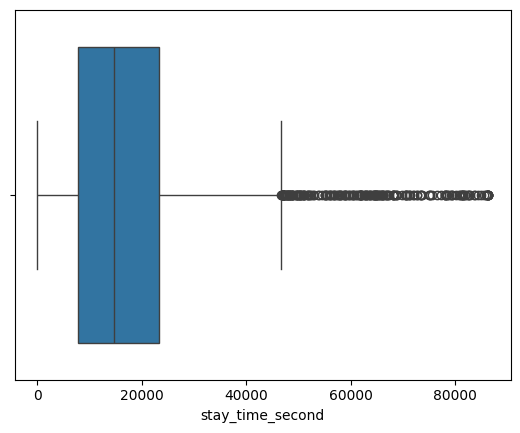

In [ ]:

#이상치 확인


# visit_df의 stay_time_second 값에 대해서 박스플랏 확인

visit_df['stay_time_second'].describe()
# 재실시간에 대한 이상치가 어느정도 있는 것 같다.60000초 :  16시간 40분 ~ 최대값 : 23시간 59분 37초

sns.boxplot(x=visit_df['stay_time_second'])


<Axes: xlabel='stay_time_second', ylabel='Count'>

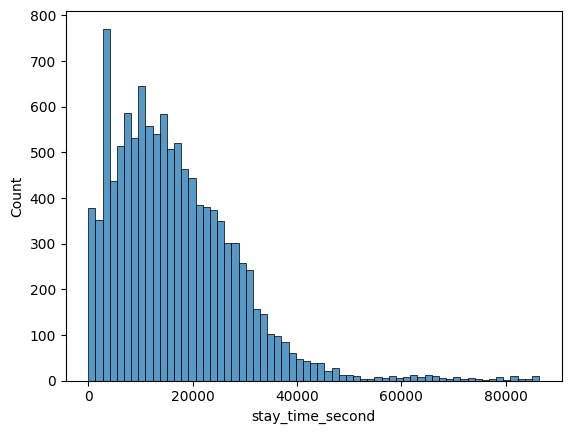

In [ ]:
# 이상치 분포 확인

sns.histplot(x=visit_df['stay_time_second'])

In [ ]:
# 출입기록에 있는 정보중에서 register 테이블에 없는 정보가 있을까?



# eda



In [ ]:
'''

- 무료체험 신청 후 방문하지 않은 유저는 얼마나 될까?
- 무료체험 후 결제한 유저는 얼마나 될까? conversion_rate 확인
- 방문객이 가장 많은 지점은 어디일까 ?
- 무료체험 유저의 평균 재실시간은 어떻게 될까?
'''


'\n\n- 무료체험 신청 후 방문하지 않은 유저는 얼마나 될까?\n- 무료체험 후 결제한 유저는 얼마나 될까? conversion_rate 확인\n- 방문객이 가장 많은 지점은 어디일까 ?\n- 무료체험 유저의 평균 재실시간은 어떻게 될까?\n'

In [ ]:
# 초 변환함수

def format_seconds_to_hms(total_seconds):

    total_seconds = round(total_seconds)
    # 초를 시간, 분, 초로 나눕니다.
    # 1. 시간 계산: 3600초로 나눈 몫
    hours = total_seconds // 3600

    # 2. 나머지 초에서 분 계산: 60초로 나눈 몫
    remaining_seconds = total_seconds % 3600
    minutes = remaining_seconds // 60

    # 3. 최종 초 계산: 60초로 나눈 나머지
    seconds = remaining_seconds % 60

    parts = []

    # 값이 0이 아닐 경우에만 리스트에 추가합니다.
    if hours > 0:
        parts.append(f"{hours}시간")

    if minutes > 0:
        parts.append(f"{minutes}분")

    # 초는 값이 0이라도 parts 리스트가 비어있으면 (0초일 때) 출력해야 하므로,
    # parts 리스트가 비어있는 경우(0초) 또는 seconds > 0 인 경우에만 추가합니다.
    if seconds > 0 or not parts:
        parts.append(f"{seconds}초")

    # 리스트의 요소들을 공백으로 연결하여 반환합니다.
    return " ".join(parts)

### 유저의 평균 재실시간

In [ ]:
# 무료체험 유저의 평균 재실시간은 어떻게 될까?
format_seconds_to_hms(visit_df['stay_time_second'].mean())

'4시간 38분 9초'

In [ ]:
# iqr 기준으로 이상치를 처리하고 평균 재실시간을 확인해보자

def cap_outliers_iqr(series):

    # 1. 사분위수 계산
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    # 2. IQR 계산 (Q3 - Q1)
    IQR = Q3 - Q1

    # 3. 상한선(Upper Bound) 및 하한선(Lower Bound) 계산
    # Upper Bound = Q3 + k * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Lower Bound = Q1 - k * IQR
    lower_bound = Q1 - 1.5 * IQR

    # 4. 이상치 치환 (Capping)
    # 상한선보다 큰 값은 상한선 값으로 치환
    capped_series = series.where(series <= upper_bound, other=upper_bound)
    capped_series = capped_series.where(capped_series >= lower_bound, other=lower_bound)

    return capped_series

format_seconds_to_hms(cap_outliers_iqr(visit_df['stay_time_second']).mean())

'4시간 32분 58초'

### 결제전환율

In [ ]:
# 결제 conversion_rate

register_user_num = register_df['user_uuid'].nunique()
payment_user_n = payment_df['user_uuid'].nunique()
payment_user_num = payment_df[payment_df['is_payment'] == 1]['user_uuid'].nunique()


print(f"무료체험 신청 유저 수 : {register_user_num}")
print(f"결제테이블 유저 수 : {payment_user_n}")
print(f"결제 유저 수 : {payment_user_num}")

retention_rate = payment_user_num / register_user_num

print(f"결제전환율 : {round(retention_rate * 100, 1)}% ")

무료체험 신청 유저 수 : 9624
결제테이블 유저 수 : 9624
결제 유저 수 : 3652
결제전환율 : 37.9% 


### 유저 정보 테이블 생성

In [ ]:
# user 정보를 한눈에 볼 수 있는 user_df 테이블 생성

user_df = pd.merge(register_df, payment_df, on='user_uuid', how='left')
user_df

,trial_date,user_uuid,is_payment
0,2023-12-21,2b251333-8676-4c11-a736-dcf2350f8821,0
1,2023-12-21,e111619a-0975-451b-9a4a-bc8aea7b7b84,0
2,2023-12-21,4a184795-b056-4572-a874-644f68609ea3,1
3,2023-12-21,2ba8ab19-2d40-4423-ad04-f0f9ca814871,0
4,2023-12-21,1d49ba36-6c23-405b-9514-aa7f4aeceff0,0
...,...,...,...
9724,2023-11-17,d7599df4-1e5a-4f5e-97ce-c42047bfd87c,0
9725,2023-11-17,43263092-3b28-4817-9fa9-4205ad3097fe,0
9726,2023-11-17,51a40f33-1027-4544-9b95-45bca7c104fb,0
9727,2023-11-18,3e649531-bf5b-4b99-84e5-ca3e0e647d0c,0


In [ ]:
# 이용자의 주 이용 지점과 총 체류시간을 계산해서 user_df에 추가 하기

# 1. 주 이용 지점 계산 (최빈값)
main_site_df = visit_df.groupby('user_uuid')['site_id'] \
                       .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None) \
                       .reset_index() \
                       .rename(columns={'site_id': 'main_site'})

# 2. 총 체류시간 계산
total_stay_df = visit_df.groupby('user_uuid')['stay_time_second'] \
                        .sum() \
                        .reset_index() \
                        .rename(columns={'stay_time_second': 'total_stay_time'})

# 3. user_df에 합치기
user_df = user_df.merge(main_site_df, on='user_uuid', how='left')
user_df = user_df.merge(total_stay_df, on='user_uuid', how='left')

# 4. 체류시간 없는 이용자는 0으로 처리 (원하면 NaN으로 남겨도 됨)
user_df['total_stay_time'] = user_df['total_stay_time'].fillna(0)

In [ ]:
user_df

,trial_date,user_uuid,is_payment,main_site,total_stay_time
0,2023-12-21,2b251333-8676-4c11-a736-dcf2350f8821,0,49.0,19596.0
1,2023-12-21,e111619a-0975-451b-9a4a-bc8aea7b7b84,0,2.0,11084.0
2,2023-12-21,4a184795-b056-4572-a874-644f68609ea3,1,NaN,0.0
3,2023-12-21,2ba8ab19-2d40-4423-ad04-f0f9ca814871,0,17.0,4775.0
4,2023-12-21,1d49ba36-6c23-405b-9514-aa7f4aeceff0,0,17.0,5037.0
...,...,...,...,...,...
9724,2023-11-17,d7599df4-1e5a-4f5e-97ce-c42047bfd87c,0,6.0,70443.0
9725,2023-11-17,43263092-3b28-4817-9fa9-4205ad3097fe,0,NaN,0.0
9726,2023-11-17,51a40f33-1027-4544-9b95-45bca7c104fb,0,6.0,87966.0
9727,2023-11-18,3e649531-bf5b-4b99-84e5-ca3e0e647d0c,0,3.0,27128.0


### 방문한 유저의 기록만 볼 수 있는 visit_user_df 생성

In [ ]:
# 유저의 방문정보

visit_features = visit_df.groupby('user_uuid').agg(
    total_visits=('user_uuid', 'count'),              # 총 방문 횟수
    avg_stay_time=('stay_time_second', 'mean')       # 방문당 평균 체류 시간
).reset_index()

# 출입정보 access_df 집계 (Aggregated Features from Access Log)
access_features = access_df.groupby('user_uuid').agg(
    total_access_count=('id', 'count')                 # 총 접속 기록 수
).reset_index()

# 모든 피처를 기본 유저 테이블에 병합 (Merge All Features)
user_df = user_df.merge(visit_features, on='user_uuid', how='left')
user_df = user_df.merge(access_features, on='user_uuid', how='left')



In [ ]:
user_df

,trial_date,user_uuid,is_payment,main_site,total_stay_time,total_visits,avg_stay_time,total_access_count
0,2023-12-21,2b251333-8676-4c11-a736-dcf2350f8821,0,49.0,19596.0,1.0,19596.0,12.0
1,2023-12-21,e111619a-0975-451b-9a4a-bc8aea7b7b84,0,2.0,11084.0,1.0,11084.0,4.0
2,2023-12-21,4a184795-b056-4572-a874-644f68609ea3,1,NaN,0.0,NaN,NaN,NaN
3,2023-12-21,2ba8ab19-2d40-4423-ad04-f0f9ca814871,0,17.0,4775.0,1.0,4775.0,3.0
4,2023-12-21,1d49ba36-6c23-405b-9514-aa7f4aeceff0,0,17.0,5037.0,1.0,5037.0,5.0
...,...,...,...,...,...,...,...,...
9724,2023-11-17,d7599df4-1e5a-4f5e-97ce-c42047bfd87c,0,6.0,70443.0,2.0,35221.5,32.0
9725,2023-11-17,43263092-3b28-4817-9fa9-4205ad3097fe,0,NaN,0.0,NaN,NaN,NaN
9726,2023-11-17,51a40f33-1027-4544-9b95-45bca7c104fb,0,6.0,87966.0,3.0,29322.0,13.0
9727,2023-11-18,3e649531-bf5b-4b99-84e5-ca3e0e647d0c,0,3.0,27128.0,1.0,27128.0,6.0


In [ ]:
# 방문한 유저의 기록만 볼 수 있는 visit_user_df 생성

visit_user_df = user_df.dropna()
visit_user_df['user_uuid'].nunique()


6023

In [ ]:
visit_user_df

,trial_date,user_uuid,is_payment,main_site,total_stay_time,total_visits,avg_stay_time,total_access_count
0,2023-12-21,2b251333-8676-4c11-a736-dcf2350f8821,0,49.0,19596.0,1.0,19596.0,12.0
1,2023-12-21,e111619a-0975-451b-9a4a-bc8aea7b7b84,0,2.0,11084.0,1.0,11084.0,4.0
3,2023-12-21,2ba8ab19-2d40-4423-ad04-f0f9ca814871,0,17.0,4775.0,1.0,4775.0,3.0
4,2023-12-21,1d49ba36-6c23-405b-9514-aa7f4aeceff0,0,17.0,5037.0,1.0,5037.0,5.0
6,2023-12-22,b2d80cf6-2ced-4270-9d7a-43119bba35d2,0,6.0,8396.0,1.0,8396.0,4.0
...,...,...,...,...,...,...,...,...
9722,2023-11-17,fab9965a-9bbe-470b-8163-3ce6352baeca,0,4.0,31128.0,2.0,15564.0,26.0
9724,2023-11-17,d7599df4-1e5a-4f5e-97ce-c42047bfd87c,0,6.0,70443.0,2.0,35221.5,32.0
9726,2023-11-17,51a40f33-1027-4544-9b95-45bca7c104fb,0,6.0,87966.0,3.0,29322.0,13.0
9727,2023-11-18,3e649531-bf5b-4b99-84e5-ca3e0e647d0c,0,3.0,27128.0,1.0,27128.0,6.0


## 결제이용자와 미결제이용자의 패턴 비교

In [ ]:
# is_payment가 0인 그룹과 1인 그룹의 평균체류시간비교


total_stay_time_0 = user_df[user_df['is_payment'] == 0]['total_stay_time'].mean()
total_stay_time_1 = user_df[user_df['is_payment'] == 1]['total_stay_time'].mean()

print(f"결제이용자의 평균 체류시간(미방문자포함) : {format_seconds_to_hms(total_stay_time_0)}")
print(f"미결제이용자의 평균 체류시간(미방문자포함) : {format_seconds_to_hms(total_stay_time_1)}")


total_stay_time_3 = visit_user_df[visit_user_df['is_payment'] == 0]['total_stay_time'].mean()
total_stay_time_4 = visit_user_df[visit_user_df['is_payment'] == 1]['total_stay_time'].mean()

print(f"결제이용자의 평균 체류시간(미방문자제외) : {format_seconds_to_hms(total_stay_time_3)}")
print(f"미결제이용자의 평균 체류시간(미방문자제외) : {format_seconds_to_hms(total_stay_time_4)}")

결제이용자의 평균 체류시간(미방문자포함) : 5시간 33분 16초
미결제이용자의 평균 체류시간(미방문자포함) : 5시간 41분 21초
결제이용자의 평균 체류시간(미방문자제외) : 8시간 42분 43초
미결제이용자의 평균 체류시간(미방문자제외) : 8시간 32분 4초


/tmp/ipython-input-1396403149.py:46: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1396403149.py:46: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1396403149.py:46: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1396403149.py:46: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1396403149.py:46: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1396403149.py:46: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1396403149.py:46: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

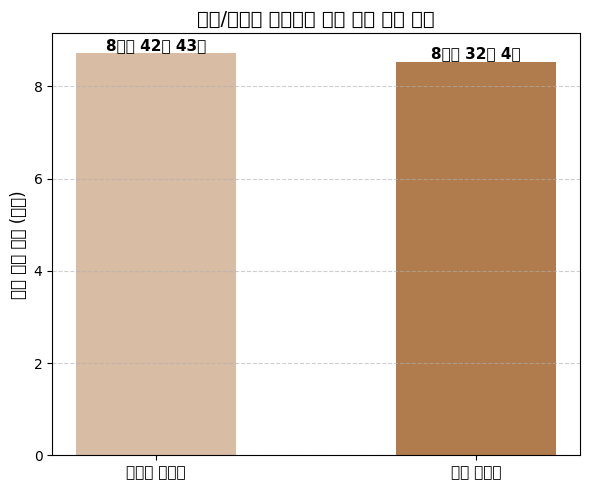

In [ ]:
import matplotlib.pyplot as plt

# 데이터 준비 (이전 단계에서 계산된 변수 사용)
stay_times_seconds = [total_stay_time_3, total_stay_time_4]
labels = ['미결제 이용자', '결제 이용자']

# 초 단위를 시간(h)으로 변환
stay_times_hours = [t / 3600 for t in stay_times_seconds]

# 색상 정의: [미결제(연한색), 결제(진한색)] 순서로 배치
colors = ['#d4b59a', '#a86d3a']

plt.figure(figsize=(6, 5))

# 막대 그래프 생성
bars = plt.bar(
    labels,
    stay_times_hours,
    color=colors,
    width=0.5,
    alpha=0.9
)

# 막대 위에 값 표시 (시간:분:초 형식)
for bar, time_sec in zip(bars, stay_times_seconds):
    # format_seconds_to_hms 함수 사용
    hms_text = format_seconds_to_hms(time_sec)

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        hms_text,
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# 축 및 제목 설정
plt.title('결제/미결제 이용자별 평균 체류 시간 비교', fontsize=14)
plt.ylabel('평균 체류 시간 (시간)', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2991856531.py:47: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2991856531.py:47: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2991856531.py:47: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2991856531.py:47: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2991856531.py:47: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2991856531.py:47: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2991856531.py:47: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(

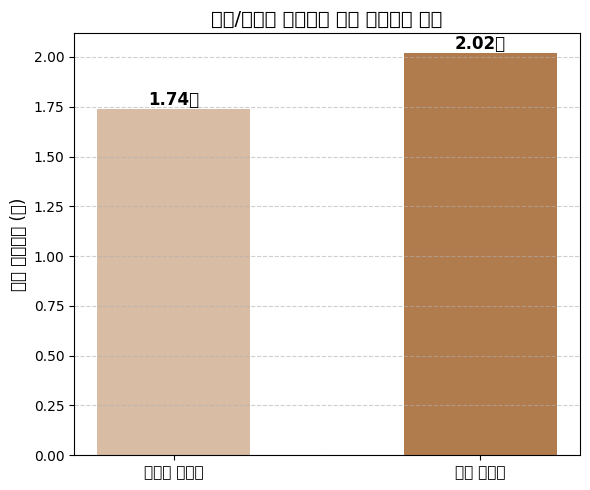

In [ ]:
import matplotlib.pyplot as plt

# 데이터 계산 (visit_user_df가 이미 정의되어 있다고 가정)
total_visit_count3 = visit_user_df[visit_user_df['is_payment'] == 0]['total_visits'].mean()
total_visit_count4 = visit_user_df[visit_user_df['is_payment'] == 1]['total_visits'].mean()

# 그래프용 데이터 준비
counts = [total_visit_count3, total_visit_count4]
labels = ['미결제 이용자', '결제 이용자']

# 색상 정의 (요청하신 테마 적용)
colors = ['#d4b59a', '#a86d3a'] # 연한색(미결제), 진한색(결제)

plt.figure(figsize=(6, 5))

# 막대 그래프 생성
# 주의: y축 값으로 counts 리스트를 사용해야 합니다.
bars = plt.bar(
    labels,
    counts,
    width=0.5,
    color=colors,
    alpha=0.9
)

# 막대 위에 값 표시 (소수점 2자리까지)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}회',  # 소수점 2자리까지 표시
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

# 축 및 제목 설정
plt.title('결제/미결제 이용자별 평균 방문횟수 비교', fontsize=14)
plt.ylabel('평균 방문횟수 (회)', fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# 여백 조정 및 출력
plt.tight_layout()
plt.show()

## 월별 현황



In [ ]:
# -----------------------------
# 1) trial_date → datetime 변환
# -----------------------------
register_df['trial_date'] = pd.to_datetime(register_df['trial_date'])

# -----------------------------
# 2) 년-월 컬럼 생성 (YYYY-MM)
# -----------------------------
register_df['year_month'] = register_df['trial_date'].dt.to_period('M').astype(str)

# -----------------------------
# 3) 무료체험 신청자 월별 집계
# -----------------------------
monthly_users = (
    register_df.groupby('year_month')['user_uuid']
               .nunique()
               .reset_index(name='total_users')
)

# -----------------------------
# 4) 결제 여부 테이블에서 "결제한 유저"만 추출
# -----------------------------
paid_users = payment_df[payment_df['is_payment'] == 1]

# -----------------------------
# 5) register_df와 join → 결제한 유저의 trial_date와 year_month 확보
# -----------------------------
merged_df = pd.merge(register_df, paid_users[['user_uuid']], on='user_uuid', how='inner')

# merged_df에는 무료체험 신청했고 결제까지 한 유저만 남음

# -----------------------------
# 6) 월별 결제 유저 수 집계
# -----------------------------
monthly_paid = (
    merged_df.groupby('year_month')['user_uuid']
             .nunique()
             .reset_index(name='payment_users')
)

# -----------------------------
# 7) 월별 이용자 + 결제자 merge
# -----------------------------
monthly_user_df = pd.merge(monthly_users, monthly_paid, on='year_month', how='left')

# NaN → 0 처리 (해당월 결제자 없는 경우)
monthly_user_df['payment_users'] = monthly_user_df['payment_users'].fillna(0).astype(int)

# -----------------------------
# 8) conversion_rate 계산 (payment_users / total_users)
# -----------------------------
monthly_user_df['conversion_rate'] = monthly_user_df['payment_users'] / monthly_user_df['total_users']


In [ ]:
# 'year_month' 문자열에서 'year' 추출
monthly_user_df['year'] = monthly_user_df['year_month'].str[:4]

# 연도별 집계: total_users와 payment_users는 합산, conversion_rate는 평균
yearly_stats = monthly_user_df.groupby('year').agg(
    total_users=('total_users', 'sum'),
    payment_users=('payment_users', 'sum'),
    conversion_rate=('conversion_rate', 'mean') # 연도별 평균 전환율
).reset_index()

# 연도별 총 전환율 계산 (선택 사항: 총 사용자/총 결제자로 계산하고 싶다면)
yearly_stats['total_conversion_rate'] = yearly_stats['payment_users'] / yearly_stats['total_users']

/tmp/ipython-input-1493274220.py:39: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1493274220.py:39: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1493274220.py:39: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1493274220.py:39: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1493274220.py:39: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1493274220.py:39: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1493274220.py:39: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

<Figure size 1400x600 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

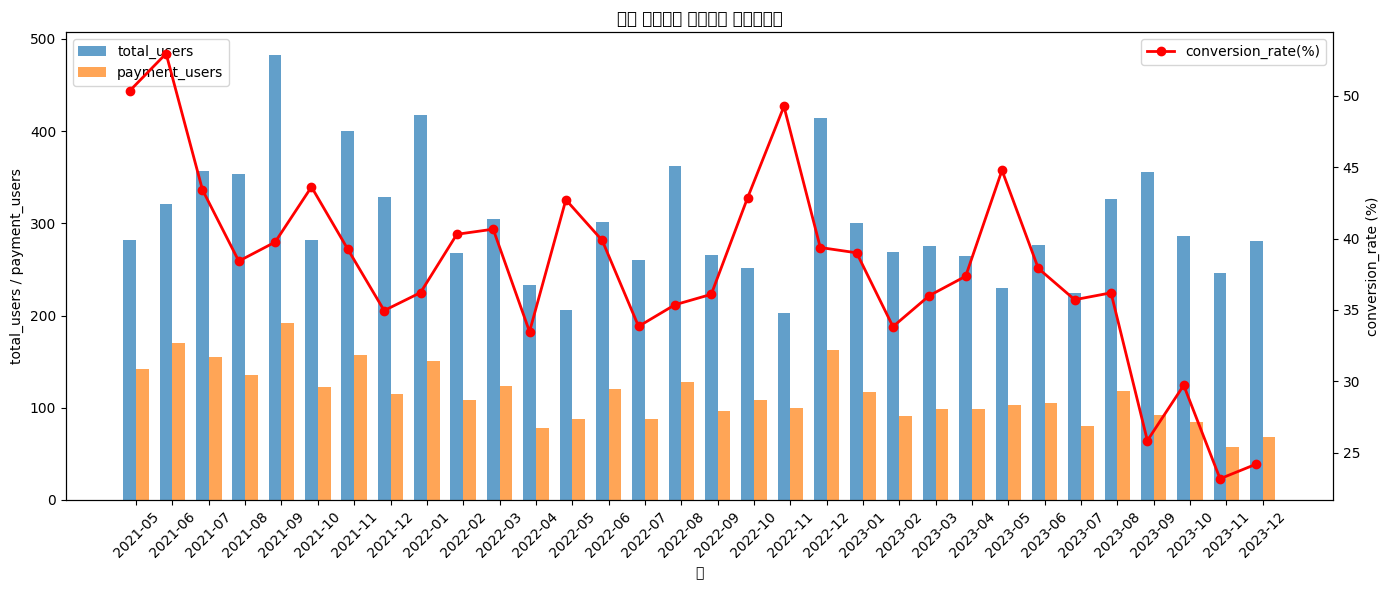

In [ ]:
# year_month는 문자열이므로 그래프 그리기 좋게 하기 위해 정렬 필요
monthly_stats = monthly_user_df.sort_values('year_month')

plt.figure(figsize=(14, 6))

# --- 막대그래프 (total_users / payment_users) ---
x = monthly_stats['year_month']
user_counts = monthly_stats['total_users']
payment_counts = monthly_stats['payment_users']

bar_width = 0.35
index = range(len(x))

fig, ax1 = plt.subplots(figsize=(14, 6))

# total_users
ax1.bar(index, user_counts, width=bar_width, label='total_users', alpha=0.7)

# payment_users (옆에 배치)
ax1.bar([i + bar_width for i in index], payment_counts,
        width=bar_width, label='payment_users', alpha=0.7)

ax1.set_xlabel('월')
ax1.set_ylabel('total_users / payment_users')
ax1.set_title('월별 무료체험 이용자의 결제전환율')
ax1.set_xticks([i + bar_width/2 for i in index])
ax1.set_xticklabels(x, rotation=45)

ax1.legend(loc='upper left')

# --- 선 그래프 (conversion_rate %, 우측 y축) ---
ax2 = ax1.twinx()
ax2.plot(index, monthly_stats['conversion_rate'] * 100,
         marker='o', linewidth=2, label='conversion_rate(%)', color='red')

ax2.set_ylabel('conversion_rate (%)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1516469427.py:49: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516469427.py:49: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516469427.py:49: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516469427.py:49: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516469427.py:49: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516469427.py:49: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1516469427.py:49: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from font(s) DejaVu Sans.
  plt.tight_lay

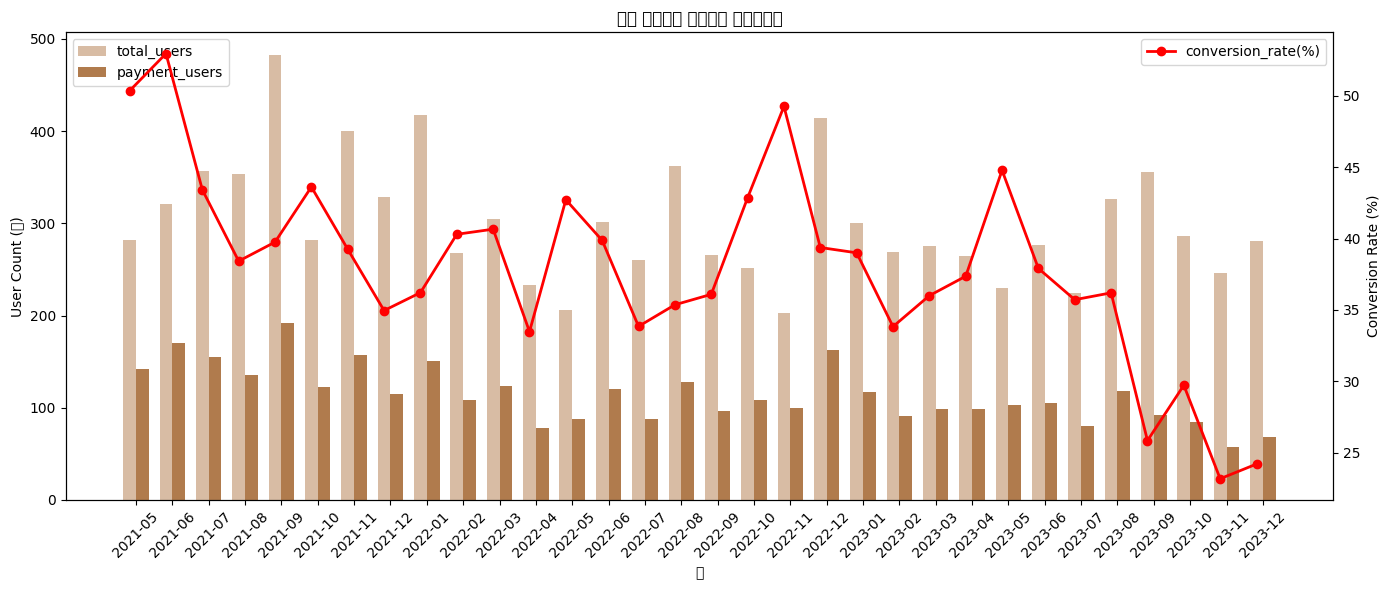

In [ ]:
import matplotlib.pyplot as plt

# year_month 정렬 (문자열 기준)
monthly_stats = monthly_user_df.sort_values('year_month')

# 색상 정의
color_dark = '#a86d3a'  # 진한 색 (결제 유저용)
color_light = '#d4b59a' # 연한 색 (전체 유저용)

# 데이터 준비
x = monthly_stats['year_month']
user_counts = monthly_stats['total_users']
payment_counts = monthly_stats['payment_users']

# 인덱스 및 바 너비 설정
bar_width = 0.35
index = range(len(x))

# 그래프 그리기 (불필요한 plt.figure() 제거하고 subplots 활용)
fig, ax1 = plt.subplots(figsize=(14, 6))

# --- 막대그래프 (total_users / payment_users) ---

# 1. total_users (연한 색 적용)
ax1.bar(index, user_counts, width=bar_width,
        label='total_users', color=color_light, alpha=0.9)

# 2. payment_users (진한 색 적용, 옆에 배치)
ax1.bar([i + bar_width for i in index], payment_counts,
        width=bar_width, label='payment_users', color=color_dark, alpha=0.9)

# 축 설정
ax1.set_xlabel('월')
ax1.set_ylabel('User Count (명)')
ax1.set_title('월별 무료체험 이용자의 결제전환율')
ax1.set_xticks([i + bar_width/2 for i in index])
ax1.set_xticklabels(x, rotation=45)
ax1.legend(loc='upper left')

# --- 선 그래프 (conversion_rate %, 우측 y축) ---
ax2 = ax1.twinx()
ax2.plot(index, monthly_stats['conversion_rate'] * 100,
         marker='o', linewidth=2, label='conversion_rate(%)', color='red')

# 우측 축 설정
ax2.set_ylabel('Conversion Rate (%)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# monthly_stats.to_csv('/content/drive/MyDrive/데이터셋/monthly_stats.csv', index=False)


In [ ]:
# 1. 'year'와 'month' 추출
monthly_user_df['year'] = monthly_user_df['year_month'].str[:4]
monthly_user_df['month'] = monthly_user_df['year_month'].str[5:7].astype(int) # 월을 숫자로 변환

# 2. 반기(상반기/하반기) 구분
def get_half_year(row):
    if row['month'] <= 6:
        return f"{row['year']}년 상반기"
    else:
        return f"{row['year']}년 하반기"

monthly_user_df['half_year'] = monthly_user_df.apply(get_half_year, axis=1)

# 3. 반기별 집계: total_users, payment_users는 합산, conversion_rate는 평균
half_yearly_stats = monthly_user_df.groupby('half_year').agg(
    total_users=('total_users', 'sum'),
    payment_users=('payment_users', 'sum'),
    conversion_rate=('conversion_rate', 'mean') # 반기별 평균 전환율
).reset_index()

# 4. 시각화를 위한 정렬 (문자열 정렬이므로 '2021년 상반기', '2021년 하반기' 순서가 되도록 정렬 키 생성)
half_yearly_stats['sort_key'] = half_yearly_stats['half_year'].str.replace('년 상반기', '.1').str.replace('년 하반기', '.2').astype(float)
half_yearly_stats = half_yearly_stats.sort_values('sort_key').drop(columns='sort_key')

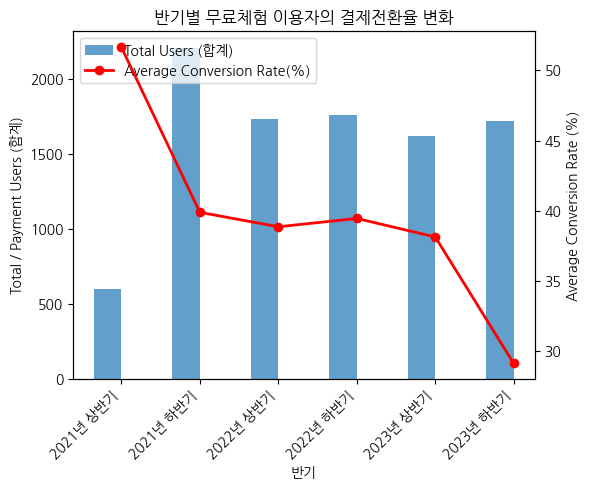

In [ ]:
# --- 시각화 ---
x = half_yearly_stats['half_year']
user_counts = half_yearly_stats['total_users']
payment_counts = half_yearly_stats['payment_users'] # 결제 사용자도 함께 표시

bar_width = 0.35
index = np.arange(len(x))

fig, ax1 = plt.subplots(figsize=(6, 5))

# 1. 막대그래프 (total_users / payment_users)
# total_users (왼쪽 축)
ax1.bar(index, user_counts, width=bar_width, label='Total Users (합계)', alpha=0.7)
ax1.set_xlabel('반기')
ax1.set_ylabel('Total / Payment Users (합계)')
ax1.set_title('반기별 무료체험 이용자의 결제전환율 변화')

# X축 레이블 위치 조정
ax1.set_xticks([i + bar_width/2 for i in index])
ax1.set_xticklabels(x, rotation=45, ha='right')

# Y축 색상
ax1.tick_params(axis='y')

# 2. 선 그래프 (conversion_rate %, 우측 y축)
ax2 = ax1.twinx()
ax2.plot(index + bar_width/2, half_yearly_stats['conversion_rate'] * 100, # 막대의 중앙에 오도록 위치 조정
         marker='o', linewidth=2, label='Average Conversion Rate(%)', color='red')

ax2.set_ylabel('Average Conversion Rate (%)')
ax2.tick_params(axis='y')
# ax2.set_ylim(0, 40) # 필요하다면 Y축 범위 조정

# 두 범례를 함께 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

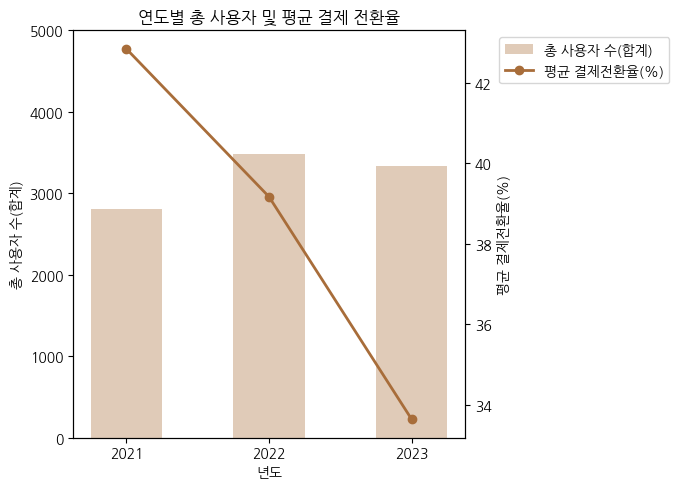

In [ ]:

yearly_stats = yearly_stats.sort_values('year')

plt.figure(figsize=(7, 5))

# --- 막대그래프 (total_users) ---
x = yearly_stats['year']
user_counts = yearly_stats['total_users']

bar_width = 0.5
index = np.arange(len(x))

fig, ax1 = plt.subplots(figsize=(7,5))

# total_users
ax1.bar(index, user_counts, width=bar_width, label='총 사용자 수(합계)', alpha=0.7,color='#d4b59a' )

ax1.set_xlabel('년도')
ax1.set_ylabel('총 사용자 수(합계)')
ax1.set_title('연도별 총 사용자 및 평균 결제 전환율')
ax1.set_xticks(index)
ax1.set_xticklabels(x)
ax1.tick_params(axis='y')
ax1.set_ylim(0, 5000)

# ax1.legend(loc='upper left') # 필요하다면 범례 위치 조정

# --- 선 그래프 (conversion_rate %, 우측 y축) ---
ax2 = ax1.twinx()
ax2.plot(index, yearly_stats['conversion_rate'] * 100,
         marker='o', linewidth=2, label='평균 결제전환율(%)',color ='#a86d3a' )

ax2.set_ylabel('평균 결제전환율(%)')
ax2.tick_params(axis='y')




# 두 범례를 함께 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 범례를 그래프 바깥쪽 (오른쪽 상단)에 위치시킵니다.
ax2.legend(lines + lines2, labels + labels2,
           loc='upper left', # 범례 내부 기준 위치 (좌측 상단)
           bbox_to_anchor=(1.07, 1.0)) # 그래프 영역 기준 (우측 바깥쪽)


plt.tight_layout() # 범례가 캔버스에 잘리지 않도록 레이아웃 조정
plt.show()

In [ ]:

yearly_stats

,year,total_users,payment_users,conversion_rate,total_conversion_rate
0,2021,2808,1190,0.428403,0.423789
1,2022,3487,1352,0.391677,0.387726
2,2023,3335,1114,0.336433,0.334033


## 지점별 평균 체류시간과 혼잡도 비교


In [ ]:
import datetime


# 방문객이 가장 많은 지점은 어디일까 ?

# site_df, visit_df를 이너조인해서 테이블 생성해서 확인

# 1) site_df와 visit_df를 site_id 기준으로 inner join
merged_df = pd.merge(visit_df, site_df, on='site_id', how='inner')

# stay_time_second가 int64 형식이므로 그대로 사용

# 2) 지점별 방문자 수 & 평균 체류시간 계산
site_stats = (
    merged_df.groupby(['site_id', 'area_pyeong'])
    .agg(
        visitors=('user_uuid', 'nunique'),
        avg_stay_seconds=('stay_time_second', 'mean')
    )
    .reset_index()
)

# 3) 초 → HH:MM:SS 형식으로 변환
site_stats['avg_stay_time'] = site_stats['avg_stay_seconds'].apply(
    lambda x: str(datetime.timedelta(seconds=int(x)))
)
# 혼잡도 추가 (평수 대비 방문자 수)
site_stats['congestion_score'] = site_stats['visitors'] / site_stats['area_pyeong']


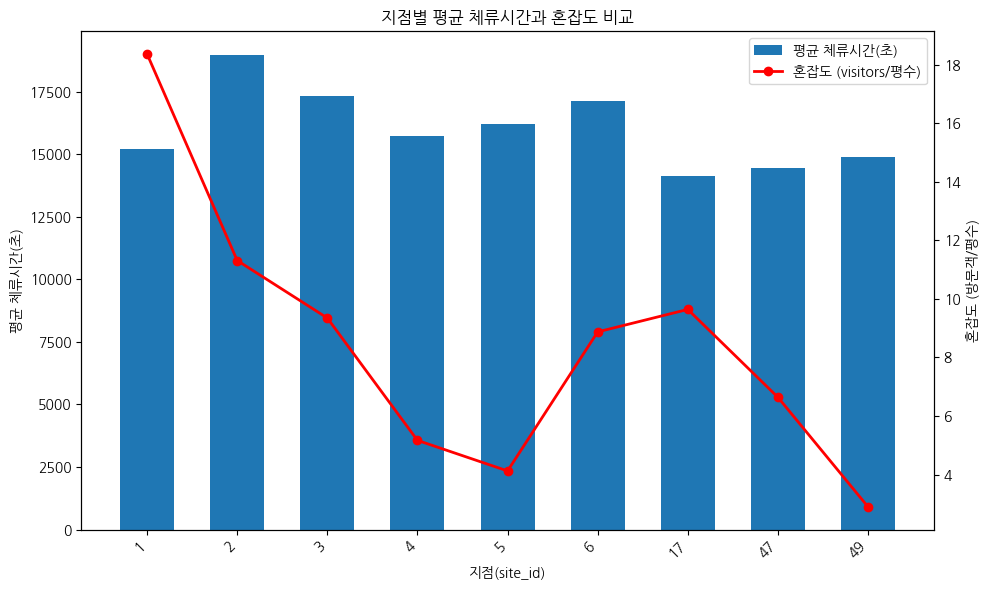

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# site_id 오름차순 정렬
site_stats_sorted = site_stats.sort_values('site_id').reset_index(drop=True)

x = np.arange(len(site_stats_sorted['site_id']))  # x축 위치
bar_width = 0.6

fig, ax1 = plt.subplots(figsize=(10, 6))

# ---------------------------
# 좌측 y축: 평균 체류시간(초) 막대
# ---------------------------
ax1.bar(x, site_stats_sorted['avg_stay_seconds'], width=bar_width, label='평균 체류시간(초)')
ax1.set_xlabel('지점(site_id)')
ax1.set_ylabel('평균 체류시간(초)')
ax1.set_xticks(x)
ax1.set_xticklabels(site_stats_sorted['site_id'], rotation=45, ha='right')

# ---------------------------
# 우측 y축: 혼잡도 선그래프
# ---------------------------
ax2 = ax1.twinx()
ax2.plot(x, site_stats_sorted['congestion_score'], color='red', marker='o', linewidth=2, label='혼잡도 (visitors/평수)')
ax2.set_ylabel('혼잡도 (방문객/평수)')

# ---------------------------
# 범례
# ---------------------------
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right')

plt.title('지점별 평균 체류시간과 혼잡도 비교')
plt.tight_layout()
plt.show()


In [ ]:
# 지점별 혼잡도 차이
print(f"혼잡도 가장 높은 지점의 혼잡도 : {site_stats['congestion_score'].max()}")
print(f"혼잡도 가장 낮은 지점의 혼잡도 : {site_stats['congestion_score'].min()}")

혼잡도 가장 높은 지점의 혼잡도 : 18.36
혼잡도 가장 낮은 지점의 혼잡도 : 2.9


In [ ]:
# 지점별 평균 체류시간의 차이

site_stats['avg_stay_seconds'].max() - site_stats['avg_stay_seconds'].min()

4843.208261399654

## 지점별 전환율

In [ ]:
# 지점별 전환율 확인


# main_site 기준으로 그룹화
conversion_df = user_df.dropna(subset=['main_site']).groupby('main_site')['is_payment'] \
                       .mean() \
                       .reset_index() \
                       .rename(columns={'is_payment': 'conversion_rate'})

# 퍼센트로 보고 싶으면
conversion_df['conversion_rate'] = conversion_df['conversion_rate'] * 100

print(conversion_df)

   main_site  conversion_rate
0        1.0        41.203178
1        2.0        36.126126
2        3.0        42.740741
3        4.0        40.442656
4        5.0        44.816054
5        6.0        35.860979
6       17.0        35.123043
7       47.0        33.846154
8       49.0        42.553191


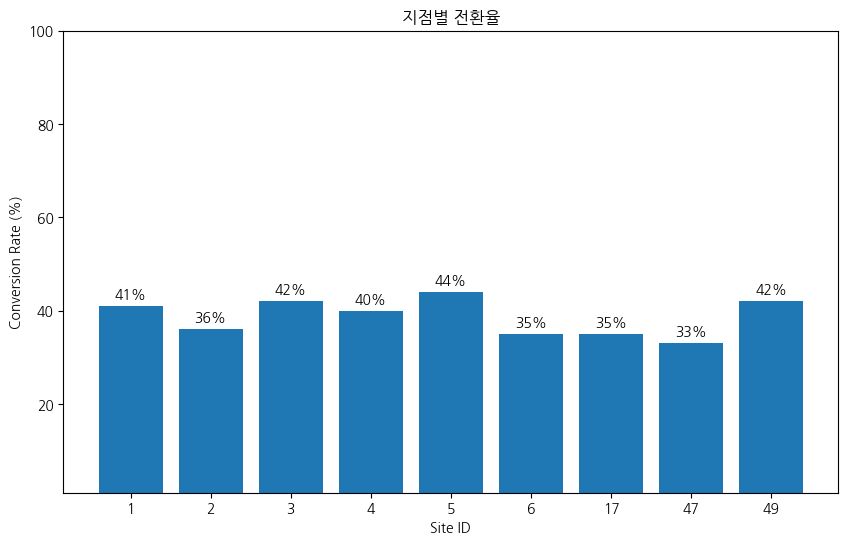

In [ ]:
conversion_df['main_site'] = conversion_df['main_site'].astype(int)
conversion_df['conversion_rate'] = conversion_df['conversion_rate'].astype(int)

# 시각화
plt.figure(figsize=(10,6))
plt.bar(conversion_df['main_site'].astype(str), conversion_df['conversion_rate'])
plt.xlabel('Site ID')
plt.ylim(1,100)
plt.ylabel('Conversion Rate (%)')
plt.title('지점별 전환율')
plt.xticks(rotation=0)

# 막대 위에 전환율 숫자 표시
for i, rate in enumerate(conversion_df['conversion_rate']):
    plt.text(i, rate + 1, f'{rate}%', ha='center', va='bottom')

plt.show()

In [ ]:
# conversion_df에서 필요한 'main_site'와 'conversion_rate' 컬럼만 선택
conversion_rates = conversion_df[['main_site', 'conversion_rate']]

# site_stats_sorted에 conversion_rates 데이터를 병합 (merge)
# left_on='site_id': site_stats_sorted의 지점 ID 컬럼
# right_on='main_site': conversion_df의 지점 ID 컬럼
site_stats_sorted = pd.merge(
    site_stats_sorted,
    conversion_rates,
    left_on='site_id',
    right_on='main_site',
    how='left'  # site_stats_sorted를 기준으로 모든 행을 유지
)

# 병합 후 불필요해진 'main_site' 컬럼은 제거
site_stats_sorted = site_stats_sorted.drop(columns=['main_site'])




In [ ]:
site_stats_sorted

,site_id,area_pyeong,visitors,avg_stay_seconds,avg_stay_time,congestion_score,conversion_rate
0,1,50,918,15224.528561,4:13:44,18.360000,41
1,2,100,1131,18966.589692,5:16:06,11.310000,36
2,3,150,1402,17329.988608,4:48:49,9.346667,42
3,4,100,517,15748.187717,4:22:28,5.170000,40
4,5,150,619,16220.446445,4:30:20,4.126667,44
5,6,150,1331,17148.320645,4:45:48,8.873333,35
6,17,50,482,14123.381430,3:55:23,9.640000,35
7,47,50,332,14449.698502,4:00:49,6.640000,33
8,49,50,145,14884.163498,4:08:04,2.900000,42


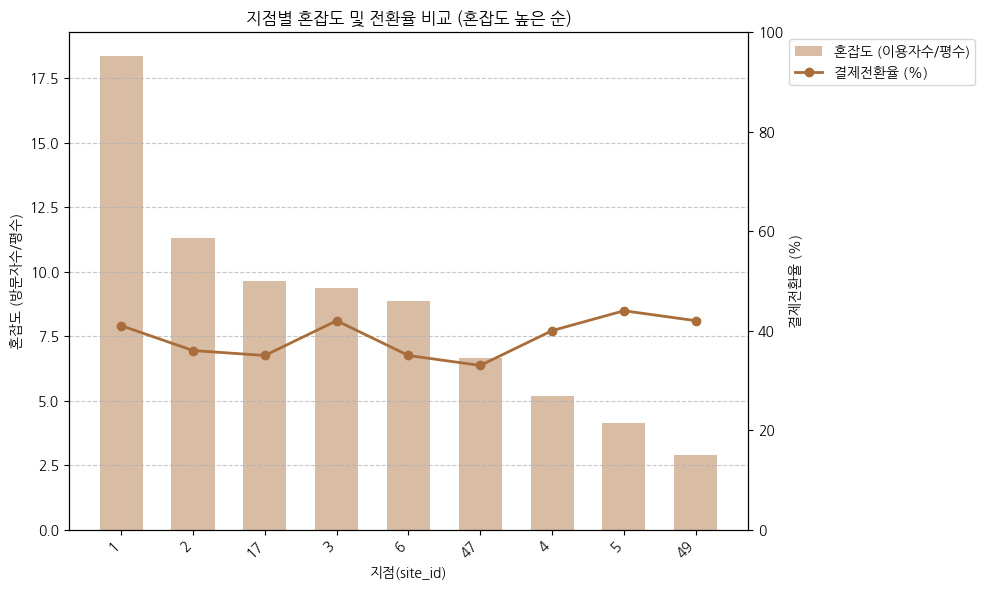

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. 먼저 전환율(conversion_rate) 데이터를 site_stats에 병합해야 합니다.
# (conversion_df가 이미 메모리에 있다고 가정합니다. 없다면 이전 셀을 실행해 주세요)
if 'conversion_rate' not in site_stats.columns:
    # conversion_df에서 필요한 컬럼만 가져와서 병합
    site_stats = pd.merge(
        site_stats,
        conversion_df[['main_site', 'conversion_rate']],
        left_on='site_id',
        right_on='main_site',
        how='left'
    )
    # 병합 후 불필요한 중복 컬럼 제거 및 결측치 처리 (0으로 채움)
    site_stats['conversion_rate'] = site_stats['conversion_rate'].fillna(0)
    if 'main_site' in site_stats.columns:
        site_stats = site_stats.drop(columns=['main_site'])


# 2. 이제 'congestion_score' 기준으로 내림차순 정렬
site_stats_sorted = site_stats.sort_values(by='congestion_score', ascending=False).reset_index(drop=True)


# --- 그래프 그리기 ---
# 색상 정의
color_dark = '#a86d3a'  # 진한 색 (선 그래프 - 전환율)
color_light = '#d4b59a' # 연한 색 (막대 그래프 - 혼잡도)

x = np.arange(len(site_stats_sorted['site_id']))  # x축 위치
bar_width = 0.6

fig, ax1 = plt.subplots(figsize=(10, 6))

# 좌측 y축 (ax1): 혼잡도 막대 그래프
ax1.bar(x, site_stats_sorted['congestion_score'], width=bar_width,
        label='혼잡도 (이용자수/평수)', color=color_light, alpha=0.9)
ax1.set_xlabel('지점(site_id)')
ax1.set_ylabel('혼잡도 (방문자수/평수)')
ax1.tick_params(axis='y')
ax1.set_xticks(x)
ax1.set_xticklabels(site_stats_sorted['site_id'], rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# 우측 y축 (ax2): 전환율 선 그래프
ax2 = ax1.twinx()
ax2.plot(x, site_stats_sorted['conversion_rate'],
         color=color_dark, marker='o', linewidth=2, label='결제전환율 (%)')
ax2.set_ylabel('결제전환율 (%)')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 100) # y축 범위 0~100 고정

# 범례
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('지점별 혼잡도 및 전환율 비교 (혼잡도 높은 순)')
plt.tight_layout()
plt.show()

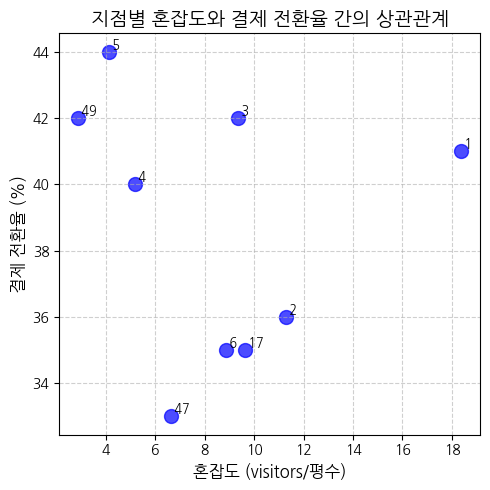

In [ ]:
plt.figure(figsize=(5,5))

# 산점도 생성
# x: 혼잡도 (독립 변수), y: 전환율 (종속 변수)
plt.scatter(
    site_stats_sorted['congestion_score'],
    site_stats_sorted['conversion_rate'],
    color='blue',
    alpha=0.7, # 투명도 설정
    s=100      # 마커 크기 설정
)

# 지점(site_id) 라벨 추가
# 각 데이터 포인트 옆에 해당 site_id를 표시합니다.
for i in range(len(site_stats_sorted)):
    site_id = site_stats_sorted['site_id'].iloc[i]
    congestion = site_stats_sorted['congestion_score'].iloc[i]
    conversion = site_stats_sorted['conversion_rate'].iloc[i]

    # 마커 오른쪽 상단에 텍스트 표시
    plt.text(
        congestion,
        conversion,
        f' {site_id}', # 텍스트 앞에 공백을 넣어 마커와 분리
        fontsize=9,
        ha='left',
        va='bottom'
    )

# 축 및 제목 설정
plt.xlabel('혼잡도 (visitors/평수)', fontsize=12)
plt.ylabel('결제 전환율 (%)', fontsize=12)
plt.title('지점별 혼잡도와 결제 전환율 간의 상관관계', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#

In [ ]:
final_df = pd.read_csv('/content/drive/MyDrive/중급2_6팀/원본데이터/final_user_df.csv')

final_df.head()

,user_uuid,is_payment,total_visit_count,total_stay_time,total_access_count,weekday_ratio,morning_ratio,afternoon_ratio,evening_ratio,night_ratio,main_site,area_pyeong
0,2b251333-8676-4c11-a736-dcf2350f8821,0,1.0,19596.0,12.0,1.0,1.0,0.0,0.0,0.0,49.0,50.0
1,e111619a-0975-451b-9a4a-bc8aea7b7b84,0,1.0,11084.0,4.0,1.0,0.0,0.0,0.0,1.0,2.0,100.0
2,4a184795-b056-4572-a874-644f68609ea3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2ba8ab19-2d40-4423-ad04-f0f9ca814871,0,1.0,4775.0,3.0,1.0,0.0,0.0,1.0,0.0,17.0,50.0
4,1d49ba36-6c23-405b-9514-aa7f4aeceff0,0,1.0,5037.0,5.0,1.0,0.0,0.0,1.0,0.0,17.0,50.0


#  스케일링

In [ ]:

# 방문자 그룹에 대해서만 클러스터링 진행

final_visit_df = final_df[final_df['total_visit_count'] != 0]

In [ ]:

# 1. 클러스터링에 사용할 피처 선택


feature_cols = ['total_visit_count', 'total_stay_time',
       'total_access_count', 'weekday_ratio', 'morning_ratio',
       'afternoon_ratio', 'evening_ratio', 'night_ratio', 'main_site']

X = final_visit_df[feature_cols].copy()

# 2. 수치형 컬럼 스케일링 (StandardScaler 적용)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_cols)

print("스케일링 완료")


스케일링 완료


# K-means     -> 우리의 최종 모델로 채택

## 최적의 k 값 찾기

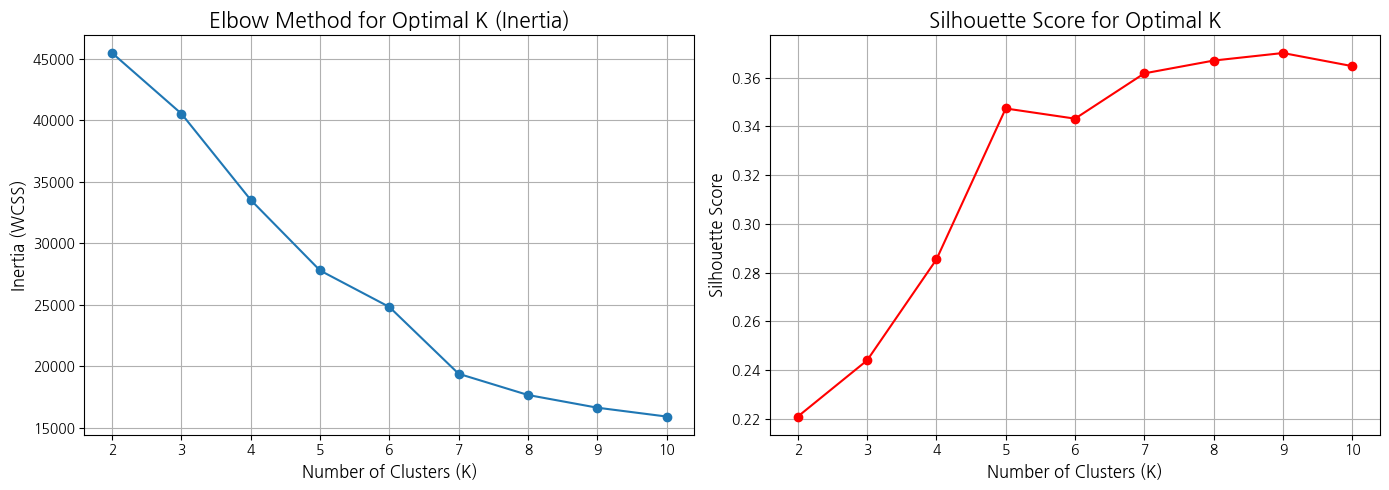


최대 실루엣 계수: 0.3701
실루엣 계수 기준 최적 K: 9


In [ ]:
#  K 범위 설정
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # Inertia (엘보우 값) 저장
    inertias.append(kmeans.inertia_)

    # 실루엣 계수 계산 및 저장
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# 최적 K값 시각화

plt.figure(figsize=(14, 5))

# 엘보우 기법 시각화
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K (Inertia)', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.grid(True)

# 실루엣 계수 시각화
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 출력
optimal_k_by_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\n최대 실루엣 계수: {np.max(silhouette_scores):.4f}")
print(f"실루엣 계수 기준 최적 K: {optimal_k_by_silhouette}")

## 최적 K 로 클러스터링 진행

In [ ]:
K_optimal = 5


# K-means 모델 학습

kmeans_model = KMeans(n_clusters=K_optimal, random_state=42, n_init='auto')
kmeans_model.fit(X_scaled)

# 군집 결과 할당

# 베이스모델 데이터프레임에 클러스터 라벨 추가

base_model_df = final_visit_df.copy()
base_model_df['cluster_label'] = kmeans_model.labels_

print(f"\nK={K_optimal} 클러스터링 완료. 군집별 데이터 수:")
print(base_model_df['cluster_label'].value_counts().sort_index())

# 클러스터별 특징 분석 (Profiling)

# 클러스터별 평균값 계산
cluster_profile = base_model_df.groupby('cluster_label')[feature_cols].mean()


print("\n=== 클러스터별 평균 특성 ===")
display(cluster_profile)


K=5 클러스터링 완료. 군집별 데이터 수:
cluster_label
0    1388
1    2415
2     398
3    1261
4     750
Name: count, dtype: int64

=== 클러스터별 평균 특성 ===


,total_visit_count,total_stay_time,total_access_count,weekday_ratio,morning_ratio,afternoon_ratio,evening_ratio,night_ratio,main_site
cluster_label,,,,,,,,,
0,2.822046,63656.244236,20.562680,0.642013,0.353451,0.418877,0.056222,0.019556,4.642651
1,1.363147,17908.389648,5.979296,0.715293,0.008415,0.936936,0.020421,0.000628,4.439752
2,1.738693,25759.434673,8.894472,0.671958,0.257239,0.595670,0.065070,0.031810,47.592965
3,1.439334,24891.576527,8.406027,0.856899,0.902001,0.044284,0.012548,0.039367,4.592387
4,1.556000,11091.561333,4.494667,0.786938,0.011965,0.032465,0.901262,0.003827,8.028000


# 주성분분석

In [ ]:
# 주성분갯수 정하기

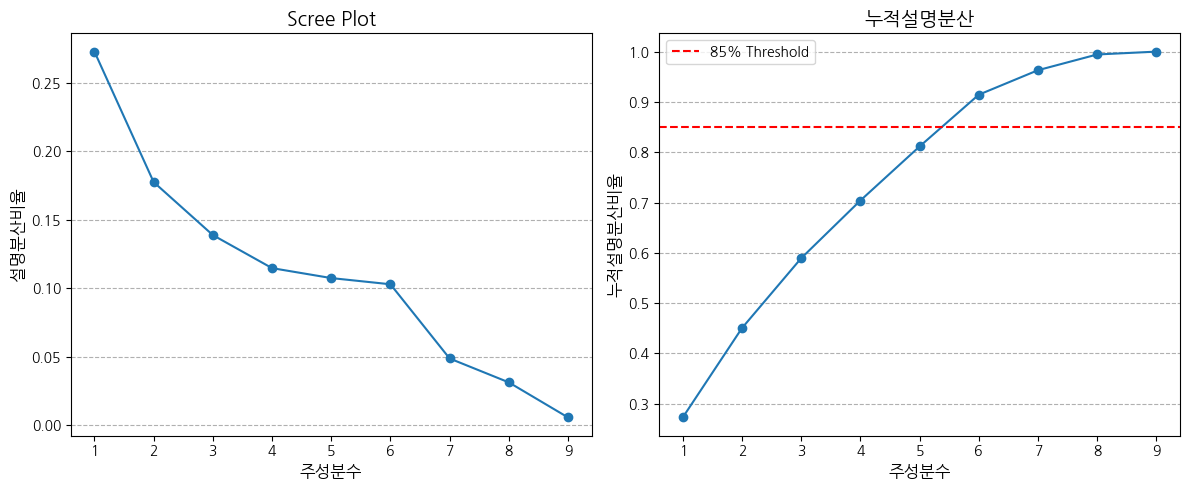


=== PCA 주성분 개수 결정 기준 ===
총 피처 개수: 9개
누적 설명 분산 85% 이상을 만족하는 최소 PC 개수: 6개


In [ ]:
from sklearn.decomposition import PCA

# 1. PCA 실행 (모든 주성분을 확인하기 위해 n_components=None)

pca_all = PCA(n_components=None, random_state=42)
pca_all.fit(X_scaled_df)

# 주성분별 설명 분산 비율
explained_variance_ratio = pca_all.explained_variance_ratio_

# 누적 설명 분산 비율
cumulative_variance = np.cumsum(explained_variance_ratio)

# 주성분 개수 (원래 피처 개수)
n_features = len(explained_variance_ratio)
component_indices = range(1, n_features + 1)


# 스크리 플롯 (시각화

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(component_indices, explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot', fontsize=14)
plt.xlabel('주성분수', fontsize=12)
plt.ylabel('설명분산비율', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.xticks(component_indices)


# 누적 설명 분산 시각화
plt.subplot(1, 2, 2)
plt.plot(component_indices, cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.85, color='red', linestyle='--', label='85% Threshold')
plt.title('누적설명분산', fontsize=14)
plt.xlabel('주성분수', fontsize=12)
plt.ylabel('누적설명분산비율', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.xticks(component_indices)
plt.legend()
plt.tight_layout()
plt.show()



# 3. 최적 K 결정 기준 출력

# 분산의 85%를 넘는 최소 주성분 개수
k_for_85_percent = np.where(cumulative_variance >= 0.85)[0][0] + 1

print("\n=== PCA 주성분 개수 결정 기준 ===")
print(f"총 피처 개수: {n_features}개")
print(f"누적 설명 분산 85% 이상을 만족하는 최소 PC 개수: {k_for_85_percent}개")

결정된 최소 주성분 갯수로 최종 pca

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


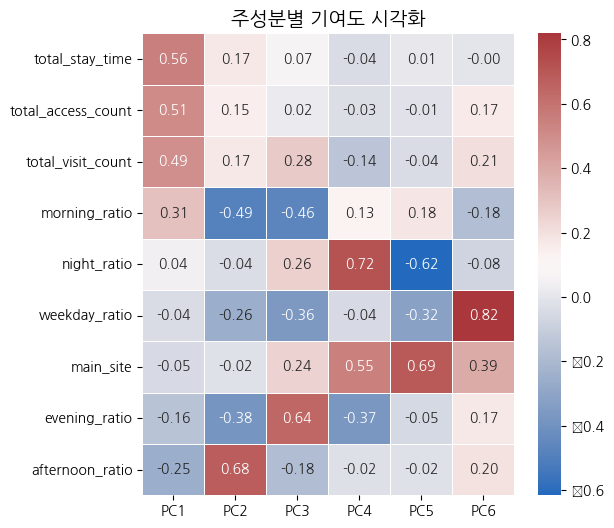

In [ ]:
 # 결정된 주성분 개수 설정

K_PCA = 6

# 1. PCA 실행 (K=6)

pca = PCA(n_components=K_PCA, random_state=42)
X_pca = pca.fit_transform(X_scaled_df)

# 주성분 이름 생성 (PC1 ~ PC6)
component_names = [f'PC{i+1}' for i in range(K_PCA)]


# 2. 주성분 프로파일링: 원본 피처 기여도 분석

# PC별 원본 피처의 기여도(가중치)를 DataFrame으로 생성
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=component_names,
    index=X_scaled_df.columns
)


#  주성분 기여도 시각화

plt.figure(figsize=(6, 6))
sns.heatmap(
    pca_components.sort_values(by='PC1', ascending=False).head(10),
    annot=True,
    fmt=".2f",
    cmap="vlag", # 양수/음수 구분을 위해 vlag 사용
    linewidths=.5,
    cbar=True
)
plt.title('주성분별 기여도 시각화', fontsize=14)
plt.show()



주성분 분석데이터로 최종 클러스터링 진행


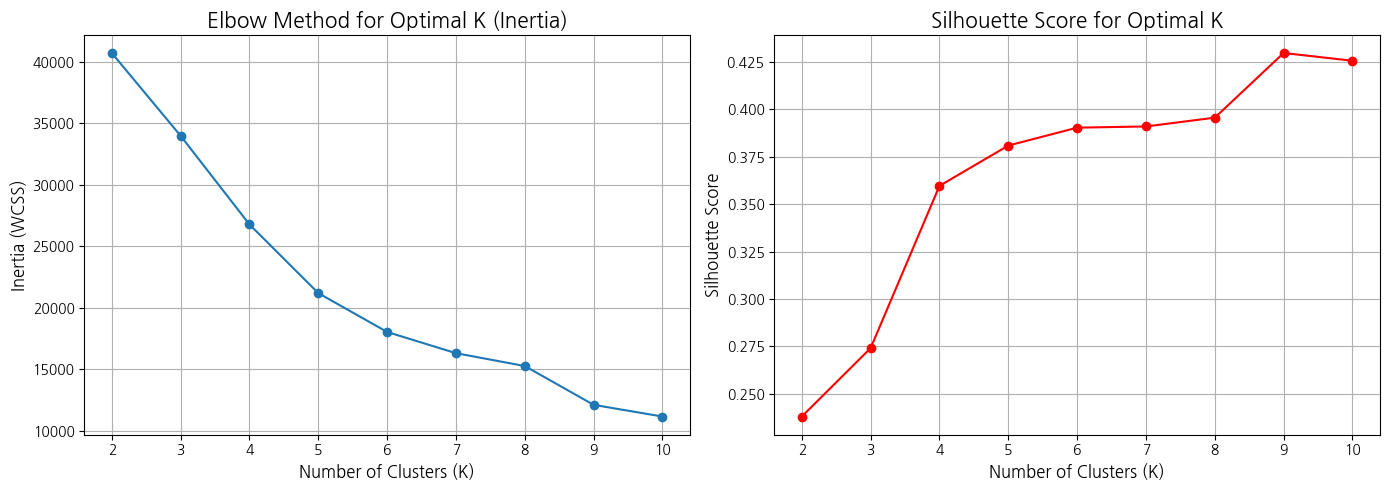


최대 실루엣 계수: 0.4297
실루엣 계수 기준 최적 K: 9


In [ ]:
#  K 범위 설정
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)

    # Inertia (엘보우 값) 저장
    inertias.append(kmeans.inertia_)

    # 실루엣 계수 계산 및 저장
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# 최적 K값 시각화

plt.figure(figsize=(14, 5))

# 엘보우 기법 시각화
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K (Inertia)', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.grid(True)

# 실루엣 계수 시각화
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.title('Silhouette Score for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 출력
optimal_k_by_silhouette = k_range[np.argmax(silhouette_scores)]
print(f"\n최대 실루엣 계수: {np.max(silhouette_scores):.4f}")
print(f"실루엣 계수 기준 최적 K: {optimal_k_by_silhouette}")

In [ ]:
# 결정된 군집 개수 설정
K_OPTIMAL = 4


# 1. K-means 클러스터링 실행 (PCA 데이터 사용)

kmeans_final = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init='auto')
kmeans_final.fit(X_pca)


# 2. 실루엣 계수 확인

silhouette_avg = silhouette_score(X_pca, kmeans_final.labels_)

print(f"\n=== K={K_OPTIMAL} 클러스터링 결과 ===")
print(f"✔️ 실루엣 계수 (Silhouette Score): {silhouette_avg:.4f}")


# 3. 결과 병합 및 최종 프로파일링 준비

# 1) final_visit_df에 클러스터 라벨 추가
final_visit_df['cluster_label'] = kmeans_final.labels_



print(f"\n✔️ 최종 클러스터링 완료. 군집별 데이터 수:")
print(final_visit_df['cluster_label'].value_counts().sort_index())


=== K=4 클러스터링 결과 ===
✔️ 실루엣 계수 (Silhouette Score): 0.3596

✔️ 최종 클러스터링 완료. 군집별 데이터 수:
cluster_label
0    1493
1    2624
2    1290
3     805
Name: count, dtype: int64


/tmp/ipython-input-1963197395.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_visit_df['cluster_label'] = kmeans_final.labels_


In [ ]:
# 주성분 분석 후 클러스터별 특징 분석 (Profiling)
mode_col = ['main_site']
mean_col = ['total_visit_count', 'total_stay_time',
       'total_access_count', 'weekday_ratio', 'morning_ratio',
       'afternoon_ratio', 'evening_ratio', 'night_ratio']


# 클러스터별 평균값 계산
mean_profile = final_visit_df.groupby('cluster_label')[mean_col].mean()
mode_profile_temp = final_visit_df.groupby('cluster_label')[mode_col].agg(lambda x: x.mode().iloc[0])
final_cluster_profile = pd.concat([mean_profile, mode_profile_temp], axis=1)
print("\n=== 클러스터별 평균 특성 ===")
display(final_cluster_profile)


=== 클러스터별 평균 특성 ===


,total_visit_count,total_stay_time,total_access_count,weekday_ratio,morning_ratio,afternoon_ratio,evening_ratio,night_ratio,main_site
cluster_label,,,,,,,,,
0,2.815807,62482.681179,20.243135,0.640536,0.337889,0.423449,0.055674,0.030997,3.0
1,1.343750,17556.344131,5.859756,0.712700,0.009303,0.928106,0.016821,0.016151,3.0
2,1.434109,25400.737984,8.641860,0.861674,0.945074,0.043150,0.009873,0.000748,6.0
3,1.618634,11728.434783,4.652174,0.768614,0.014489,0.047388,0.875807,0.005229,6.0


In [ ]:
# 2) final_user_df에 주성분 점수 추가 (시각화 및 PC 기반 프로파일링용)
pca_df = pd.DataFrame(X_pca, columns=component_names, index=final_visit_df.index)
final_pca_df = pd.concat([final_visit_df, pca_df], axis=1)

/tmp/ipython-input-3051850547.py:8: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  sns.scatterplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


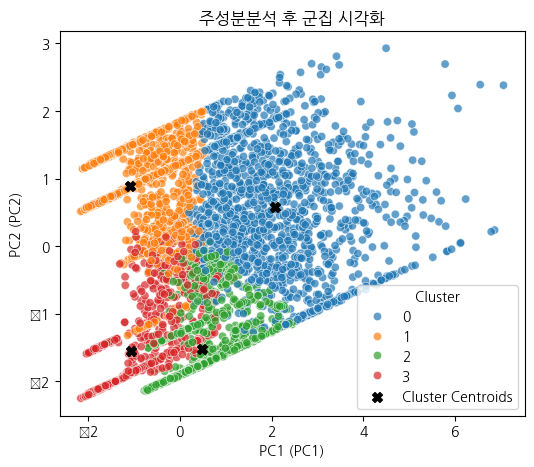

In [ ]:
# 시각화

# 시각화 설정
plt.figure(figsize=(6, 5))

# 산점도(Scatter Plot) 생성
# X축: PC1 점수, Y축: PC2 점수, 색상: cluster_label
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='cluster_label',
    data=final_pca_df,
    palette=sns.color_palette('tab10', n_colors=7), # K=7에 맞는 색상 팔레트 사용
    legend='full',
    alpha=0.7 # 투명도 설정
)

# 클러스터 중심점 표시 (선택 사항: PC 점수 평균 계산 후 표시)
cluster_centers = final_pca_df.groupby('cluster_label')[['PC1', 'PC2']].mean().reset_index()

plt.scatter(
    cluster_centers['PC1'],
    cluster_centers['PC2'],
    marker='X', # 중심점을 X 모양으로 표시
    s=50,      # 크기 키움
    color='black',
    label='Cluster Centroids'
)

plt.title('주성분분석 후 군집 시각화')
plt.xlabel(f"PC1 ({final_pca_df['PC1'].name})") # PC1 축에 이름 추가
plt.ylabel(f"PC2 ({final_pca_df['PC2'].name})") # PC2 축에 이름 추가
plt.legend(title='Cluster')

plt.show()

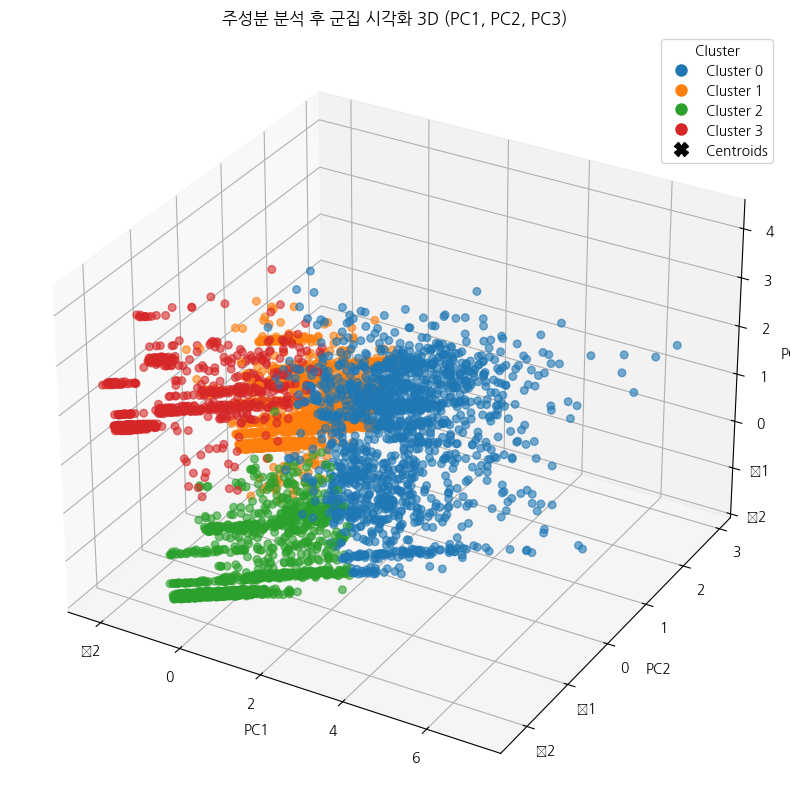

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# 클러스터 개수
K_OPTIMAL = 4


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 색상 팔레트 설정
colors = sns.color_palette('tab10', n_colors=K_OPTIMAL)
# cluster_label에 따라 색상을 매핑
cluster_colors = [colors[label] for label in final_pca_df['cluster_label']]


# 3D 산점도 생성

scatter = ax.scatter(
    final_pca_df['PC1'],
    final_pca_df['PC2'],
    final_pca_df['PC3'],
    c=cluster_colors,
    marker='o',
    s=30,
    alpha=0.6
)


# 레이블 및 제목 설정

ax.set_title('주성분 분석 후 군집 시각화 3D (PC1, PC2, PC3)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# 범례 추가
# Custom legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
                             markersize=10, markerfacecolor=colors[i]) for i in range(K_OPTIMAL)]
legend_handles.append(plt.Line2D([0], [0], marker='X', color='w', label='Centroids',
                                 markersize=10, markeredgecolor='black', markerfacecolor='black'))

ax.legend(handles=legend_handles, title='Cluster', loc='best')


plt.show()

# (피처 중요도를 보기 위한 용도) 모델만들기

In [ ]:
# 베이직 에측 분류모델 만들어보기

base_model_df = user_df.copy()

base_model_df = base_model_df.merge(
    site_df[['site_id','area_pyeong']],
    left_on='main_site',
    right_on='site_id',
    how='left'
)

base_model_df = base_model_df.drop(columns=['main_site'])

# 방문한 인원만 확인
base_model_df = base_model_df.dropna()
base_model_df.columns

Index(['trial_date', 'user_uuid', 'year_month', 'is_payment',
       'total_stay_time', 'total_visits', 'avg_stay_time',
       'total_access_count', 'site_id', 'area_pyeong'],
      dtype='object')

## xgboost를 통해서 분류예측모델을 만들고 피처중요도를 뽑아보자



모델 성능 (AUC) : 0.5842

 XGBoost 피처 중요도 (Feature Importance):
total_visits          0.420449
avg_stay_time         0.139555
total_access_count    0.115922
area_pyeong           0.111369
total_stay_time       0.107675
site_id               0.105031
dtype: float32


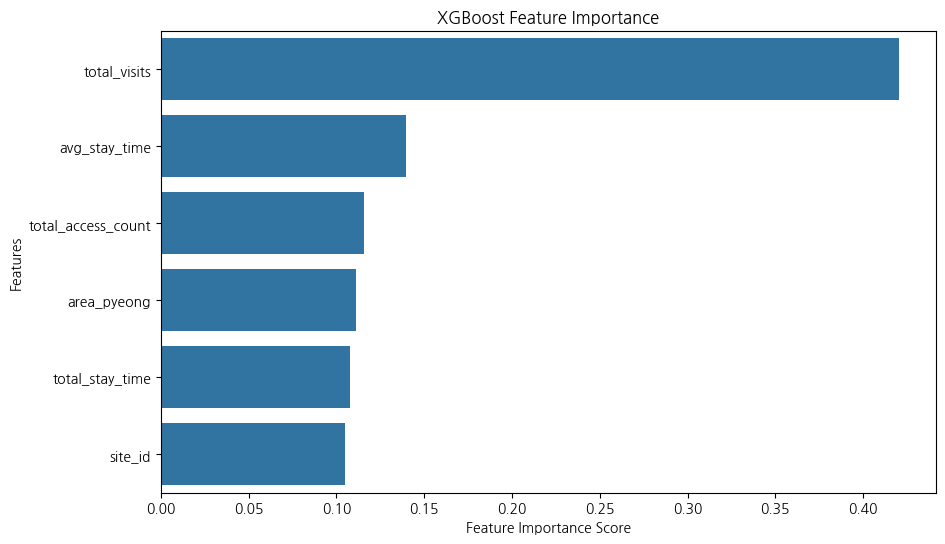

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



# 1. 데이터 준비: X(피처), y(타겟)
# 'user_uuid'는 모델 학습에 사용하지 않습니다.
# 'trial_date'는 일단 제외

feature_cols = ['total_stay_time',
       'total_visits', 'avg_stay_time', 'total_access_count', 'site_id',
       'area_pyeong']

X = base_model_df[feature_cols]
y = base_model_df['is_payment']

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. XGBoost 모델 학습
model = xgb.XGBClassifier(
    random_state=42
)

model.fit(X_train, y_train)

# 4. 모델 성능 평가 (선택 사항)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n모델 성능 (AUC) : {auc:.4f}")

# 5. 피처 중요도 추출 및 시각화 (Feature Importance)

importance = pd.Series(model.feature_importances_, index=feature_cols)
importance_sorted = importance.sort_values(ascending=False)

print("\n XGBoost 피처 중요도 (Feature Importance):")
print(importance_sorted)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_sorted.values, y=importance_sorted.index)
plt.title('XGBoost Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

## 분류예측모델


모델 성능 (AUC) : 0.6291

 XGBoost 피처 중요도 (Feature Importance):
total_visit_count     0.180402
evening_ratio         0.151416
afternoon_ratio       0.109829
total_stay_time       0.108459
morning_ratio         0.103059
weekday_ratio         0.100105
main_site             0.095843
total_access_count    0.094688
night_ratio           0.056199
dtype: float32


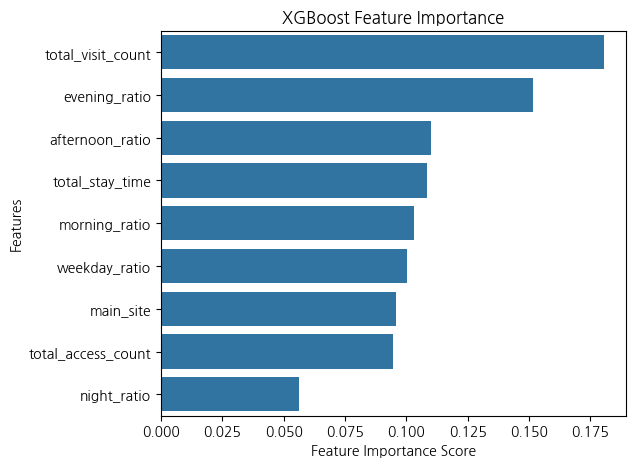

In [ ]:
# 베이스 모델 전환율관련 피처중요도 뽑아보기


# 전처리

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

feature = ['total_visit_count',
 'total_stay_time',
 'total_access_count',
 'weekday_ratio',
 'morning_ratio',
 'afternoon_ratio',
 'evening_ratio',
 'night_ratio',
 'main_site'
 ]

# 1. 데이터 준비: X(피처), y(타겟)

base_model_df = final_visit_df.copy()


X_xgb = base_model_df[feature]
y = base_model_df['is_payment']

# 2. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_xgb, y, test_size=0.2, random_state=42, stratify=y
)

# 3. XGBoost 모델 학습
model = xgb.XGBClassifier(
    random_state=42
)

model.fit(X_train, y_train)

# 4. 모델 성능 평가 (선택 사항)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n모델 성능 (AUC) : {auc:.4f}")

# 5. 피처 중요도 추출 및 시각화 (Feature Importance)

importance = pd.Series(model.feature_importances_, index=feature)
importance_sorted = importance.sort_values(ascending=False)

print("\n XGBoost 피처 중요도 (Feature Importance):")
print(importance_sorted)

# 시각화
plt.figure(figsize=(6, 5))
sns.barplot(x=importance_sorted.values, y=importance_sorted.index)
plt.title('XGBoost Feature Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

# 군집 성능 비교

### DBSCAN + GMM

--- GMM 결과 (K=4) ---
실루엣 계수: 0.2947
------------------------------


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


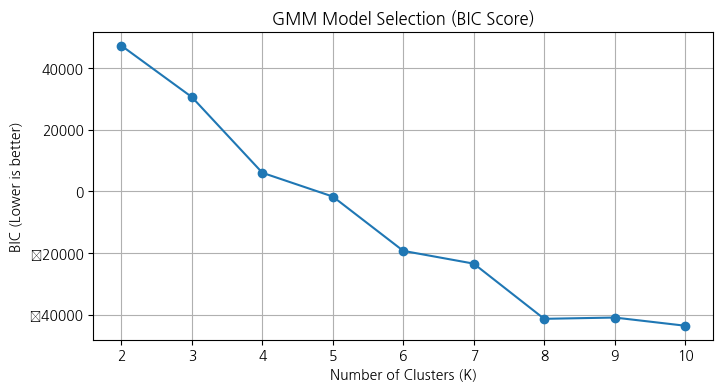

BIC 기준 최적의 K: 10


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1. GMM 모델 학습 (K=4, K-means와 동일 조건 비교)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
gmm_score = silhouette_score(X_pca, gmm_labels)

print(f"--- GMM 결과 (K=4) ---")
print(f"실루엣 계수: {gmm_score:.4f}")
print("-" * 30)

# 2. 최적의 K 찾기 (BIC: Bayesian Information Criterion 낮을수록 좋음)
bic_scores = []
k_range = range(2, 11)

for k in k_range:
    model = GaussianMixture(n_components=k, random_state=42)
    model.fit(X_pca)
    bic_scores.append(model.bic(X_pca))

# BIC 그래프 시각화
plt.figure(figsize=(8, 4))
plt.plot(k_range, bic_scores, marker='o')
plt.title('GMM Model Selection (BIC Score)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC (Lower is better)')
plt.grid(True)
plt.show()

# BIC가 가장 낮은 K값 확인
best_k_bic = k_range[np.argmin(bic_scores)]
print(f"BIC 기준 최적의 K: {best_k_bic}")

실루엣 계수 계산 중...
K=2 완료: 0.2138
K=3 완료: 0.2349
K=4 완료: 0.2947
K=5 완료: 0.2787
K=6 완료: 0.2820
K=7 완료: 0.2793
K=8 완료: 0.2680
K=9 완료: 0.2938
K=10 완료: 0.3029


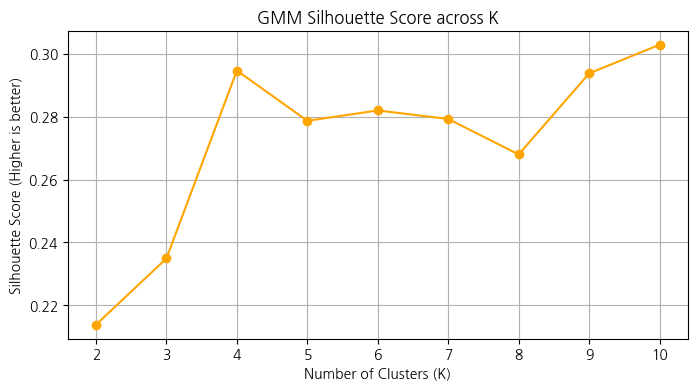

실루엣 계수 기준 최적의 K: 10


In [ ]:
from sklearn.mixture import GaussianMixture  # <-- 이 줄이 없어서 에러가 난 것입니다
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 기존 변수 설정 (그래프용)
silhouette_scores = []
k_range = range(2, 11)

print("실루엣 계수 계산 중...")

for k in k_range:
    # 1. GMM 모델 생성 및 학습
    model = GaussianMixture(n_components=k, random_state=42)

    # 2. X_pca 데이터로 학습하고 라벨 예측
    # (주의: X_pca 변수는 이미 메모리에 있어야 합니다. 만약 X_pca도 없다는 에러가 나면 데이터를 다시 로드해야 합니다)
    labels = model.fit_predict(X_pca)

    # 3. 실루엣 계수 계산 및 저장
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"K={k} 완료: {score:.4f}")

# 그래프 시각화
plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('GMM Silhouette Score across K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score (Higher is better)')
plt.grid(True)
plt.show()

# 최적 K값 출력
best_k_sil = k_range[np.argmax(silhouette_scores)]
print(f"실루엣 계수 기준 최적의 K: {best_k_sil}")

In [ ]:
import pandas as pd

# DBSCAN의 라벨 분포 확인
# (best_dbscan_labels 변수가 메모리에 있다고 가정)
unique, counts = np.unique(best_dbscan_labels, return_counts=True)
dbscan_result = dict(zip(unique, counts))

print("--- DBSCAN 군집별 데이터 개수 ---")
print(dbscan_result)

# 전체 데이터 중 노이즈 비율 계산
total_count = len(best_dbscan_labels)
noise_count = dbscan_result.get(-1, 0)
noise_ratio = (noise_count / total_count) * 100

print(f"\n❌ 노이즈(분석 포기) 데이터 비율: {noise_ratio:.2f}%")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 데이터 준비 (기존 데이터 활용)
# final_visit_df가 메모리에 없다면 로드 필요
# final_df = pd.read_csv('final_user_df.csv')
# final_visit_df = final_df[final_df['total_visit_count'] != 0].copy()

# 전처리 및 스케일링
feature_cols = ['total_visit_count', 'total_stay_time', 'total_access_count',
                'weekday_ratio', 'morning_ratio', 'afternoon_ratio', 'evening_ratio', 'night_ratio', 'main_site']
X = final_visit_df[feature_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (K-means와 동일 조건 유지)
pca = PCA(n_components=6, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 2. GMM 최적 파라미터 전수 조사 (Grid Search)
print("🔍 GMM 모든 경우의 수 탐색 시작")

# 탐색할 파라미터 범위 설정
# 1) 군집 개수 (K): 2개부터 10개까지
n_components_range = range(2, 11)

# 2) 공분산 유형 (Covariance Type): 군집의 모양 결정
# - full: 각 군집이 서로 다른 타원형 (가장 유연함)
# - tied: 모든 군집이 같은 타원형
# - diag: 타원 축이 축과 평행
# - spherical: 원형 (K-means와 유사)
covariance_types = ['full', 'tied', 'diag', 'spherical']

# 3) 초기화 방법
init_params_list = ['kmeans', 'random']

best_gmm_score = -1
best_gmm_params = {}
results = []

# 3중 반복문으로 모든 조합 테스트
for n_comp in n_components_range:
    for cov_type in covariance_types:
        for init_param in init_params_list:
            try:
                # 모델 생성 및 학습
                gmm = GaussianMixture(n_components=n_comp,
                                      covariance_type=cov_type,
                                      init_params=init_param,
                                      random_state=42)
                labels = gmm.fit_predict(X_pca)

                # 실루엣 계수 계산
                score = silhouette_score(X_pca, labels)

                # 결과 기록
                results.append({
                    'n_components (K)': n_comp,
                    'covariance_type': cov_type,
                    'init_params': init_param,
                    'silhouette_score': score
                })

                # 최고 점수 갱신
                if score > best_gmm_score:
                    best_gmm_score = score
                    best_gmm_params = {
                        'n_components': n_comp,
                        'covariance_type': cov_type,
                        'init_params': init_param
                    }

            except Exception as e:
                continue

# 3. 최종 결과 출력
print("\n" + "="*50)
print("🏆 GMM 성능 탐색 완료! (Best Model)")
print("="*50)
print(f"✔️ 최고 실루엣 계수: {best_gmm_score:.4f}")
print(f"✔️ 최적의 파라미터 조합:")
print(f"   - 군집 수 (K): {best_gmm_params['n_components']}")
print(f"   - 군집 모양 (Covariance): {best_gmm_params['covariance_type']}")
print(f"   - 초기화 방식 (Init): {best_gmm_params['init_params']}")

# 상위 10개 조합 확인
results_df = pd.DataFrame(results)
print("\n📊 점수 상위 10개 모델 리스트:")
print(results_df.sort_values(by='silhouette_score', ascending=False).head(10).to_string(index=False))

🔍 GMM 모든 경우의 수 탐색 시작

🏆 GMM 성능 탐색 완료! (Best Model)
✔️ 최고 실루엣 계수: 0.3939
✔️ 최적의 파라미터 조합:
   - 군집 수 (K): 10
   - 군집 모양 (Covariance): tied
   - 초기화 방식 (Init): kmeans

📊 점수 상위 10개 모델 리스트:
 n_components (K) covariance_type init_params  silhouette_score
               10            tied      kmeans          0.393856
                9            tied      kmeans          0.391312
                6            tied      kmeans          0.309095
               10            diag      random          0.304672
                7            tied      kmeans          0.303425
               10            diag      kmeans          0.303051
               10            full      kmeans          0.302909
                5            tied      kmeans          0.301196
                4            full      kmeans          0.294691
                9            diag      random          0.293885


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. 데이터 준비 (기존 데이터가 메모리에 있다면 로드 부분 생략 가능)
# final_visit_df가 없으면 로드 필요
# final_df = pd.read_csv('final_user_df.csv')
# final_visit_df = final_df[final_df['total_visit_count'] != 0].copy()

# 전처리 및 스케일링
feature_cols = ['total_visit_count', 'total_stay_time', 'total_access_count',
                'weekday_ratio', 'morning_ratio', 'afternoon_ratio', 'evening_ratio', 'night_ratio', 'main_site']
X = final_visit_df[feature_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 수행 (6차원, K-means/GMM과 동일 조건)
pca = PCA(n_components=6, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 2. DBSCAN 파라미터 전수 조사 (Grid Search)
print("🔍 DBSCAN 모든 경우의 수 탐색 시작... (잠시만 기다려주세요)")

# 탐색할 파라미터 범위 설정
# eps: 0.1부터 3.0까지 0.1 단위로 촘촘하게
eps_range = np.arange(0.1, 3.1, 0.1)

# min_samples: 차원 수(6) 주변 값들로 설정 (보통 차원*2=12를 기준으로 함)
min_samples_range = [5, 7, 10, 12, 15, 20, 30]

best_dbscan_score = -1
best_dbscan_params = {}
results = []

for eps_val in eps_range:
    for min_samples_val in min_samples_range:
        try:
            # 모델 생성 및 학습
            dbscan = DBSCAN(eps=eps_val, min_samples=min_samples_val)
            labels = dbscan.fit_predict(X_pca)

            # 군집 분석
            unique_labels = set(labels)
            n_clusters = len(unique_labels) - (1 if -1 in labels else 0) # 노이즈 제외 군집 수
            n_noise = list(labels).count(-1) # 노이즈 개수
            noise_ratio = n_noise / len(labels) # 노이즈 비율

            # 유의미한 군집이 형성된 경우에만 점수 계산
            # 조건: 군집이 2개 이상이고, 노이즈가 전체 데이터의 100%가 아닐 때
            if n_clusters > 1 and n_noise < len(labels):
                score = silhouette_score(X_pca, labels)

                # 결과 기록
                results.append({
                    'eps': eps_val,
                    'min_samples': min_samples_val,
                    'n_clusters': n_clusters,
                    'noise_count': n_noise,
                    'noise_ratio': noise_ratio,
                    'silhouette_score': score
                })

                # 최고 점수 갱신
                if score > best_dbscan_score:
                    best_dbscan_score = score
                    best_dbscan_params = {
                        'eps': eps_val,
                        'min_samples': min_samples_val,
                        'n_clusters': n_clusters,
                        'noise_ratio': noise_ratio
                    }
        except Exception as e:
            continue

# 3. 최종 결과 출력
print("\n" + "="*50)
print("🏆 DBSCAN 성능 탐색 완료! (Best Model)")
print("="*50)

if best_dbscan_score == -1:
    print("❌ 적절한 군집을 형성하는 파라미터를 찾지 못했습니다.")
else:
    print(f"✔️ 최고 실루엣 계수: {best_dbscan_score:.4f}")
    print(f"✔️ 최적의 파라미터 조합:")
    print(f"   - eps (반경): {best_dbscan_params['eps']:.1f}")
    print(f"   - min_samples (최소 샘플): {best_dbscan_params['min_samples']}")
    print(f"   - 형성된 군집 수: {best_dbscan_params['n_clusters']}개")
    print(f"   - 노이즈(버려진 데이터) 비율: {best_dbscan_params['noise_ratio']*100:.1f}%")

    # 상위 10개 조합 확인 (노이즈 비율도 같이 확인하세요!)
    results_df = pd.DataFrame(results)
    print("\n📊 점수 상위 10개 모델 리스트 (노이즈 비율 주의!):")
    print(results_df.sort_values(by='silhouette_score', ascending=False).head(10).to_string(index=False))

🔍 DBSCAN 모든 경우의 수 탐색 시작... (잠시만 기다려주세요)

🏆 DBSCAN 성능 탐색 완료! (Best Model)
✔️ 최고 실루엣 계수: 0.4382
✔️ 최적의 파라미터 조합:
   - eps (반경): 2.5
   - min_samples (최소 샘플): 7
   - 형성된 군집 수: 2개
   - 노이즈(버려진 데이터) 비율: 0.1%

📊 점수 상위 10개 모델 리스트 (노이즈 비율 주의!):
 eps  min_samples  n_clusters  noise_count  noise_ratio  silhouette_score
 2.5           10           2            5     0.000805          0.438234
 2.5            7           2            5     0.000805          0.438234
 2.5            5           2            4     0.000644          0.437726
 2.6           10           2            2     0.000322          0.420252
 2.5           30           3           35     0.005634          0.373071
 1.6           10           3           97     0.015615          0.341393
 1.5           10           3          102     0.016420          0.340945
 1.9           20           3           94     0.015132          0.340776
 2.1           30           3           89     0.014327          0.340773
 1.7           15       

In [ ]:
import pandas as pd

# 1. 모델별 성능 탐색 결과 요약 (제공해주신 로그 기반)
# K-Means의 점수는 앞선 분석 단계의 결과(약 0.37~0.38 예상)를 사용하거나 직접 입력해주세요.
k_means_score_placeholder = 0.3751

data = [
    {
        "Model": "DBSCAN",
        "Best Silhouette": 0.4382, # 로그에서 확인된 최고 점수
        "Optimal Clusters": "2개",
        "Key Parameter": "eps=2.5, min_samples=7",
        "Assessment": "[기각] 전체 고객을 단 2개 그룹(A/B)으로만 나눔. 세분화 마케팅 불가능",
        "Final Decision": "Drop"
    },
    {
        "Model": "GMM (Gaussian Mixture)",
        "Best Silhouette": 0.3939, # 로그에서 확인된 최고 점수
        "Optimal Clusters": "10개",
        "Key Parameter": "K=10, cov=tied",
        "Assessment": "[기각] 최적 성능을 위해 10개 군집 필요. 관리 포인트 과다로 비효율적",
        "Final Decision": "Drop"
    },
    {
        "Model": "K-Means",
        "Best Silhouette": k_means_score_placeholder, # K=4일 때의 점수
        "Optimal Clusters": "4개",
        "Key Parameter": "K=4 (Elbow Point)",
        "Assessment": "[선정] 관리 용이한 4개 그룹으로 명확히 구분되며, 현업 적용(Action)에 최적",
        "Final Decision": "Select"
    }
]

# 2. 데이터프레임 생성
df_comparison = pd.DataFrame(data)

# 3. 컬럼 순서 정리
cols = ["Model", "Best Silhouette", "Optimal Clusters", "Assessment", "Final Decision"]
df_final = df_comparison[cols]

# 4. 스타일링 및 출력 (보고서용)
print("=== 🏆 클러스터링 모델 최종 선정 근거표 ===")
print("※ Insight:")
print("1. DBSCAN은 점수가 가장 높지만 군집이 2개뿐이라 변별력이 없음")
print("2. GMM은 점수를 높이려면 군집이 10개나 필요해 복잡도가 높음")
print("3. 따라서 '성능'과 '효율성'의 균형점인 K-Means(K=4)를 최종 채택함\n")

# 표 출력
display(df_final)

=== 🏆 클러스터링 모델 최종 선정 근거표 ===
※ Insight:
1. DBSCAN은 점수가 가장 높지만 군집이 2개뿐이라 변별력이 없음
2. GMM은 점수를 높이려면 군집이 10개나 필요해 복잡도가 높음
3. 따라서 '성능'과 '효율성'의 균형점인 K-Means(K=4)를 최종 채택함



,Model,Best Silhouette,Optimal Clusters,Assessment,Final Decision
0,DBSCAN,0.4382,2개,[기각] 전체 고객을 단 2개 그룹(A/B)으로만 나눔. 세분화 마케팅 불가능,Drop
1,GMM (Gaussian Mixture),0.3939,10개,[기각] 최적 성능을 위해 10개 군집 필요. 관리 포인트 과다로 비효율적,Drop
2,K-Means,0.3751,4개,"[선정] 관리 용이한 4개 그룹으로 명확히 구분되며, 현업 적용(Action)에 최적",Select


# 기대 효과

/tmp/ipython-input-3566102873.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/10000) + '만' for x in current_values])


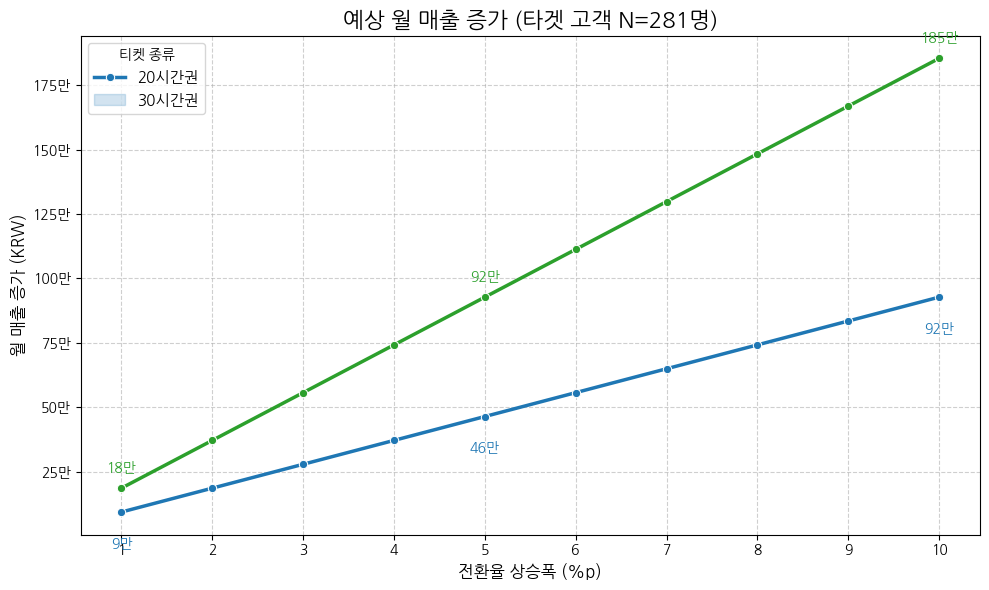

--- 👥 모수 281명 기준 기대 매출표 (단위: 원) ---
Ticket Type         20 Hours Ticket 30 Hours Ticket
Conversion Lift (%)                                
1                            92,730         185,460
2                           185,460         370,920
3                           278,190         556,380
4                           370,920         741,840
5                           463,650         927,300
6                           556,380       1,112,760
7                           649,110       1,298,220
8                           741,840       1,483,680
9                           834,570       1,669,140
10                          927,300       1,854,600


/tmp/ipython-input-3566102873.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(pivot_table.applymap('{:,.0f}'.format))


In [ ]:
# 1. 변수 설정
N_target = 281  # 사용자 지정 모수 (2023년 12월 기준 가정)
prices = {
    '20 Hours Ticket': 33000,
    '30 Hours Ticket': 66000
}
conversion_lifts = np.arange(1, 11, 1)  # 전환율 상승폭: 1% ~ 10%

# 2. 데이터 생성
data = []
for name, p in prices.items():
    for cr in conversion_lifts:
        # 추가 결제 인원 = 281명 * (전환율/100)
        # (사람 수는 소수점이 될 수 없으므로 반올림 처리)
        new_paying_users = N_target * (cr / 100)

        # 추가 매출
        revenue = new_paying_users * p

        data.append({
            'Ticket Type': name,
            'Price': p,
            'New Users': new_paying_users,
            'Conversion Lift (%)': cr,
            'Revenue': revenue
        })

df_fixed = pd.DataFrame(data)

# 3. 시각화
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
sns.lineplot(data=df_fixed, x='Conversion Lift (%)', y='Revenue', hue='Ticket Type',
             palette={'20 Hours Ticket': 'tab:blue', '30 Hours Ticket': 'tab:green'},
             marker='o', linewidth=2.5)

plt.title(f'예상 월 매출 증가 (타겟 고객 N={N_target}명)', fontsize=16, fontweight='bold')
plt.xlabel('전환율 상승폭 (%p)', fontsize=12)
plt.ylabel('월 매출 증가 (KRW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# X축 틱 설정 (1~10%)
plt.xticks(conversion_lifts)

# Y축 포맷팅 (만원 단위)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/10000) + '만' for x in current_values])

# 범례 설정
plt.legend(title='티켓 종류', labels=['20시간권', '30시간권'], fontsize=11)

# 값 표시 (Annotation) - 가독성을 위해 일부 구간만 표시
for i, row in df_fixed.iterrows():
    if row['Conversion Lift (%)'] in [1, 5, 10]:
        offset = 50000 if row['Ticket Type'] == '30 Hours Ticket' else -150000
        color = 'tab:green' if row['Ticket Type'] == '30 Hours Ticket' else 'tab:blue'

        plt.text(row['Conversion Lift (%)'], row['Revenue'] + offset,
                 f"{int(row['Revenue']/10000)}만",
                 ha='center', va='bottom', fontweight='bold', color=color, fontsize=10)

plt.tight_layout()
plt.show()

# 4. 결과표 출력
print(f"--- 👥 모수 {N_target}명 기준 기대 매출표 (단위: 원) ---")
pivot_table = df_fixed.pivot(index='Conversion Lift (%)', columns='Ticket Type', values='Revenue')
print(pivot_table.applymap('{:,.0f}'.format))


/tmp/ipython-input-1824757860.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x/10000) + '만' for x in current_values])


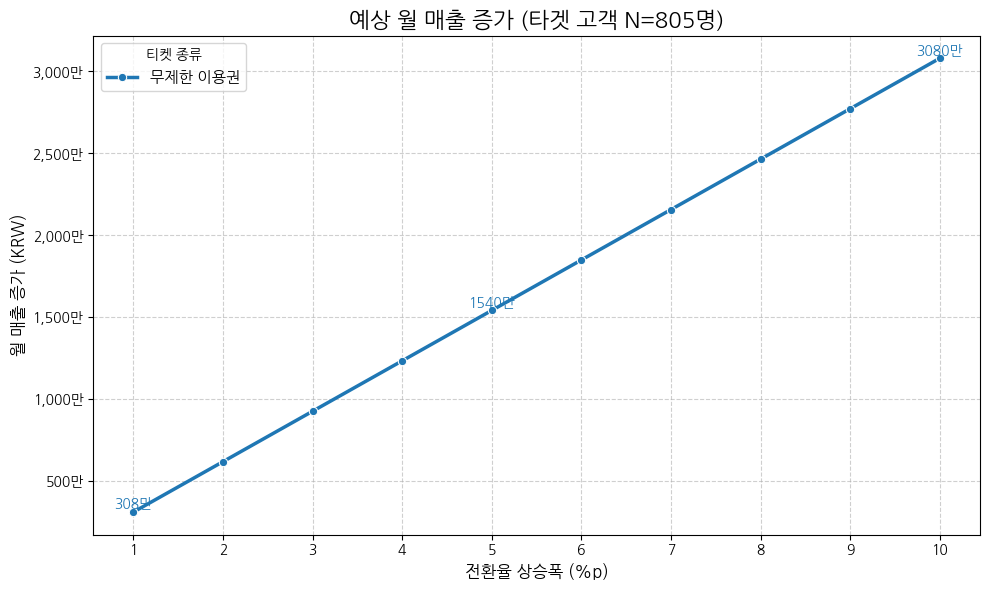

--- 👥 모수 805명 기준 기대 매출표 (단위: 원) ---
Ticket Type             무제한 이용권
Conversion Lift (%)            
1                     3,080,000
2                     6,160,000
3                     9,240,000
4                    12,320,000
5                    15,400,000
6                    18,480,000
7                    21,560,000
8                    24,640,000
9                    27,720,000
10                   30,800,000


/tmp/ipython-input-1824757860.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(pivot_table.applymap('{:,.0f}'.format))


In [ ]:
# 1. 변수 설정
N_target = 805  # 사용자 지정 모수 (2023년 12월 기준 가정)
prices = {
    '무제한 이용권': 385000, # '무제한'을 '무제한 이용권'으로 변경
}
conversion_lifts = np.arange(1, 11, 1)  # 전환율 상승폭: 1% ~ 10%

# 2. 데이터 생성
data = []
for name, p in prices.items():
    for cr in conversion_lifts:
        # 추가 결제 인원 = 281명 * (전환율/100)
        # (사람 수는 소수점이 될 수 없으므로 반올림 처리)
        new_paying_users = round(N_target * (cr / 100))

        # 추가 매출
        revenue = new_paying_users * p

        data.append({
            'Ticket Type': name,
            'Price': p,
            'New Users': new_paying_users,
            'Conversion Lift (%)': cr,
            'Revenue': revenue
        })

df_fixed = pd.DataFrame(data)

# 3. 시각화
plt.figure(figsize=(10, 6))

# 선 그래프 그리기
sns.lineplot(data=df_fixed, x='Conversion Lift (%)', y='Revenue', hue='Ticket Type',
             palette={'무제한 이용권': 'tab:blue'}, # 팔레트 키도 변경
             marker='o', linewidth=2.5)

plt.title(f'예상 월 매출 증가 (타겟 고객 N={N_target}명)', fontsize=16, fontweight='bold')
plt.xlabel('전환율 상승폭 (%p)', fontsize=12)
plt.ylabel('월 매출 증가 (KRW)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# X축 틱 설정 (1~10%)
plt.xticks(conversion_lifts)

# Y축 포맷팅 (만원 단위)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x/10000) + '만' for x in current_values])

# 범례 설정
plt.legend(title='티켓 종류', fontsize=11) # 범례 제목 변경

# 값 표시 (Annotation) - 가독성을 위해 일부 구간만 표시
for i, row in df_fixed.iterrows():
    if row['Conversion Lift (%)'] in [1, 5, 10]:
        # 현재 단일 티켓 종류이므로 조건식은 그대로 두되, 라벨만 변경
        offset = 50000 if row['Ticket Type'] == '무제한 이용권' else -150000
        color = 'tab:blue' # 단일 색상으로 고정하거나, 다른 색상 선택

        plt.text(row['Conversion Lift (%)'], row['Revenue'] + offset,
                 f"{int(row['Revenue']/10000)}만",
                 ha='center', va='bottom', fontweight='bold', color=color, fontsize=10)

plt.tight_layout()
plt.show()

# 4. 결과표 출력
print(f"--- 👥 모수 {N_target}명 기준 기대 매출표 (단위: 원) ---")
pivot_table = df_fixed.pivot(index='Conversion Lift (%)', columns='Ticket Type', values='Revenue')
print(pivot_table.applymap('{:,.0f}'.format))


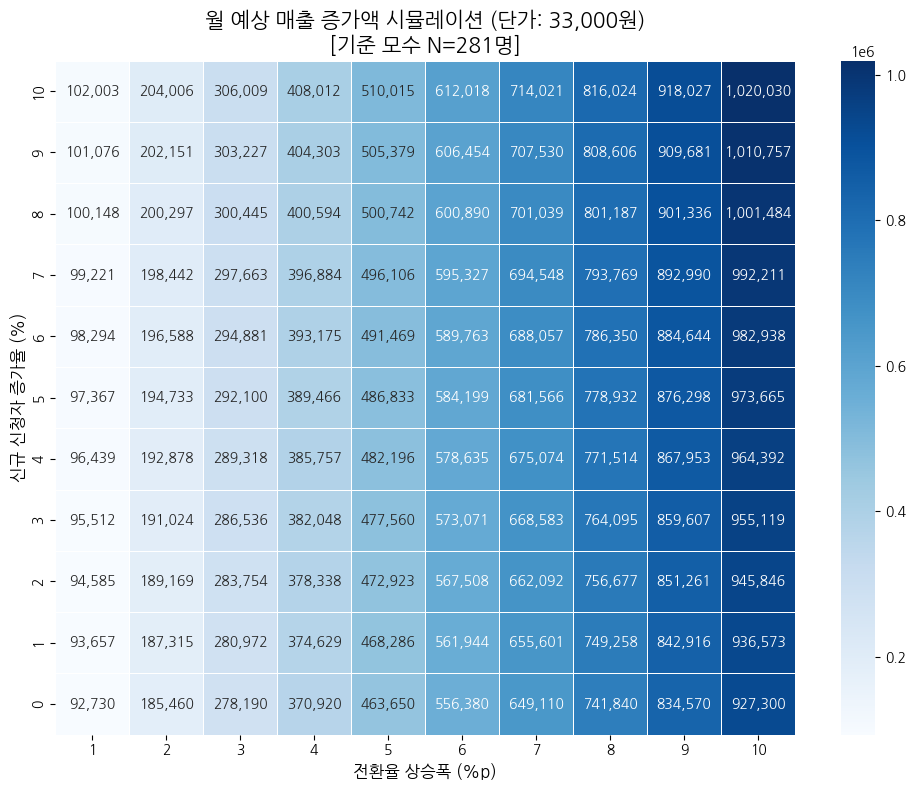

▲ 위 그래프는 단가 33,000원 기준 시뮬레이션입니다.



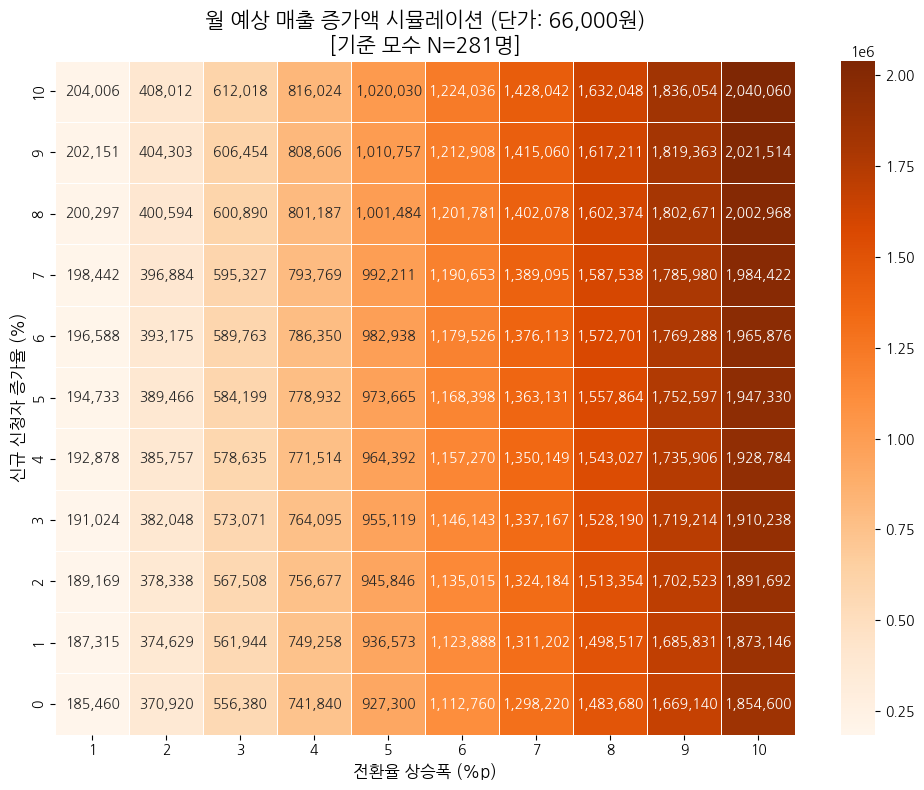

▲ 위 그래프는 단가 66,000원 기준 시뮬레이션입니다.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import platform

# 1. 한글 폰트 설정 (OS에 맞게 자동 설정)
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':  # Mac
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic') # Linux/Colab 등

# 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 2. 공통 변수 설정
current_N = 281
prices = [33000, 66000]                     # 33,000원과 66,000원 각각 출력
traffic_growth_rates = np.arange(0, 11, 1)  # 신규 신청자 증가율: 0% ~ 10%
cr_lifts = np.arange(1, 11, 1)              # 전환율 상승폭: 1%p ~ 10%p

# 3. 가격별로 반복하며 각각 그리기
for price in prices:
    # --- 데이터 계산 (Expected Value) ---
    data = []
    for growth in traffic_growth_rates:
        for cr in cr_lifts:
            # 기대 모수 = 현재인원 * (1 + 증가율)
            expected_N = current_N * (1 + growth / 100)

            # 기대 매출 증가분 = 기대 모수 * 전환율상승분 * 가격
            revenue_increase = expected_N * (cr / 100) * price

            data.append({
                '신규 신청자 증가율 (%)': growth,
                '전환율 상승폭 (%p)': cr,
                '매출 증가액': revenue_increase
            })

    df_temp = pd.DataFrame(data)
    # 한글 컬럼명으로 피벗 테이블 생성
    pivot_table = df_temp.pivot(index='신규 신청자 증가율 (%)', columns='전환율 상승폭 (%p)', values='매출 증가액')

    # --- 시각화 (각각의 Figure 생성) ---
    plt.figure(figsize=(10, 8))  # 매번 새로운 캔버스 생성

    # 색상 테마 구분 (33000원은 파랑, 66000원은 주황 계열)
    cmap_color = 'Blues' if price == 33000 else 'Oranges'

    # 히트맵 그리기
    sns.heatmap(pivot_table, annot=True, fmt=',.0f',
                cmap=cmap_color, linewidths=.5, annot_kws={"size": 10})

    # 한글 제목 및 라벨 설정
    plt.title(f'월 예상 매출 증가액 시뮬레이션 (단가: {price:,}원)\n[기준 모수 N={current_N}명]', fontsize=15, fontweight='bold')
    plt.xlabel('전환율 상승폭 (%p)', fontsize=12)
    plt.ylabel('신규 신청자 증가율 (%)', fontsize=12)

    # Y축 상향식 정렬 (0%가 아래, 10%가 위로)
    plt.gca().invert_yaxis()

    plt.tight_layout()

    # 그래프 출력
    plt.show()

    # 텍스트 결과 출력
    print(f"▲ 위 그래프는 단가 {price:,}원 기준 시뮬레이션입니다.\n" + "="*50 + "\n")

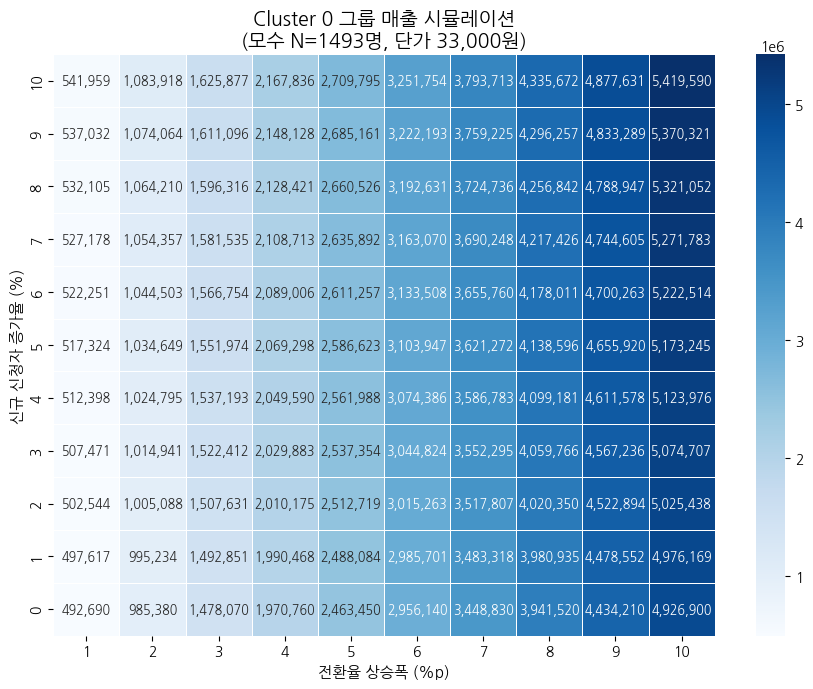

▶ Cluster 0 (인원 1493명) 분석 완료



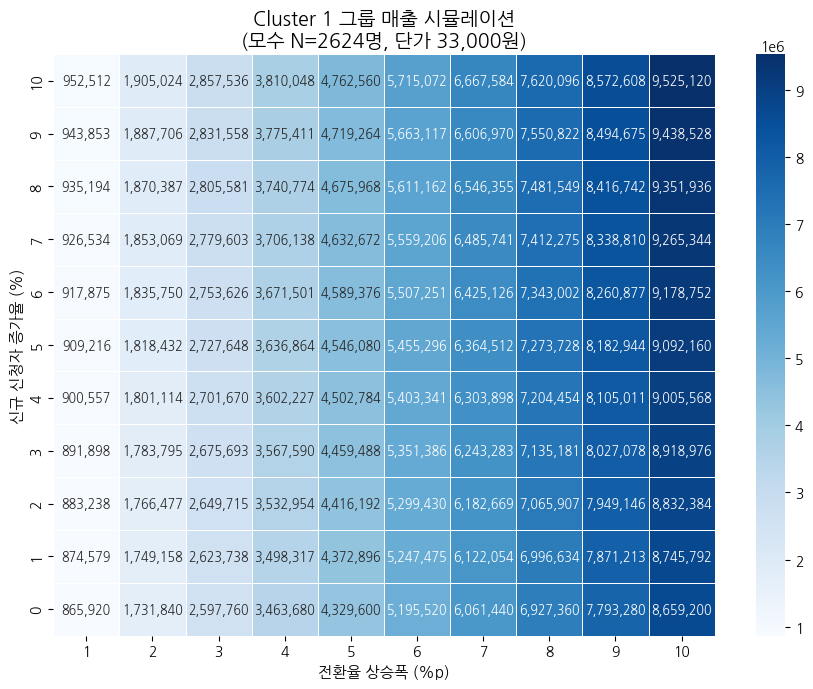

▶ Cluster 1 (인원 2624명) 분석 완료



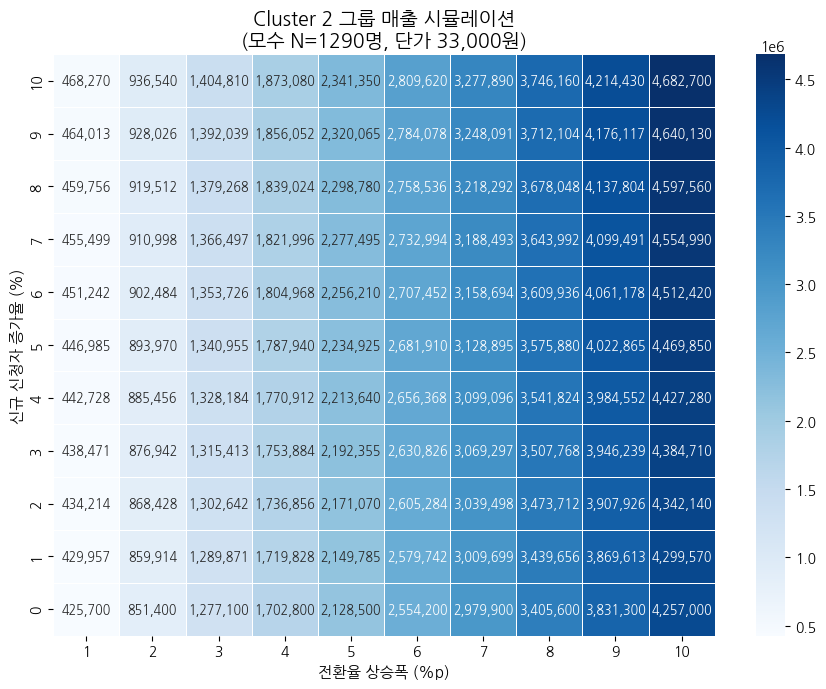

▶ Cluster 2 (인원 1290명) 분석 완료



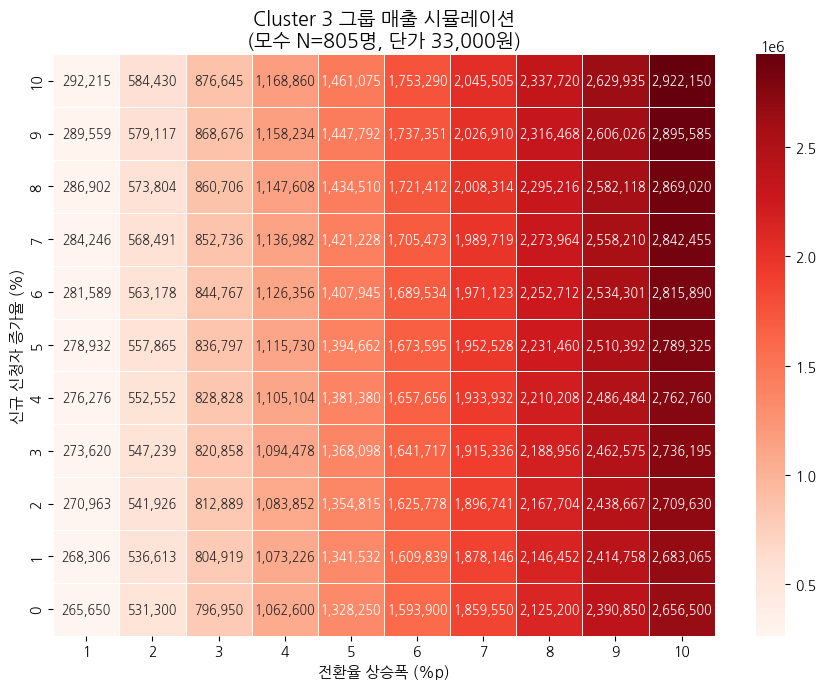

▶ Cluster 3 (인원 805명) 분석 완료



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import platform

# 1. 폰트 설정 (한글 깨짐 방지)
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':  # Mac
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

# ==========================================
# ★ 핵심: 클러스터별 인원수 설정 (노트북 데이터 기반)
# (실제로는 df에서 .value_counts()로 가져오면 됩니다)
# ==========================================
cluster_counts = {
    0: 1493,
    1: 2624,
    2: 1290,
    3: 805   # 사용자님이 궁금해하신 3번 그룹
}

price = 33000 # 분석할 가격
traffic_growth_rates = np.arange(0, 11, 1)  # 신규 유입 증가율
cr_lifts = np.arange(1, 11, 1)              # 전환율 상승폭

# 2. 클러스터별 반복문 실행
for cluster_id, n_users in cluster_counts.items():

    # --- 특정 클러스터만 보고 싶으면 여기서 필터링 ---
    # if cluster_id != 3: continue

    # 데이터 계산 (해당 클러스터의 N 적용)
    data = []
    for growth in traffic_growth_rates:
        for cr in cr_lifts:
            # 해당 클러스터 인원(n_users)을 기준으로 확장 모수 계산
            expected_N = n_users * (1 + growth / 100)

            # 매출 증가분 계산
            revenue_increase = expected_N * (cr / 100) * price

            data.append({
                '신규 신청자 증가율 (%)': growth,
                '전환율 상승폭 (%p)': cr,
                '매출 증가액': revenue_increase
            })

    df_temp = pd.DataFrame(data)
    pivot_table = df_temp.pivot(index='신규 신청자 증가율 (%)', columns='전환율 상승폭 (%p)', values='매출 증가액')

    # --- 시각화 ---
    plt.figure(figsize=(9, 7))

    # 클러스터별로 색상을 다르게 주면 구분이 쉽습니다 (옵션)
    # 예: 3번 그룹은 붉은색 계열(Reds)
    color_map = 'Reds' if cluster_id == 3 else 'Blues'

    sns.heatmap(pivot_table, annot=True, fmt=',.0f',
                cmap=color_map, linewidths=.5, annot_kws={"size": 9})

    plt.title(f'Cluster {cluster_id} 그룹 매출 시뮬레이션\n(모수 N={n_users}명, 단가 {price:,}원)', fontsize=14, fontweight='bold')
    plt.xlabel('전환율 상승폭 (%p)', fontsize=11)
    plt.ylabel('신규 신청자 증가율 (%)', fontsize=11)
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

    print(f"▶ Cluster {cluster_id} (인원 {n_users}명) 분석 완료\n")